# Binary oversampling

This notebook presents the general usecase of the ```smote_variants``` package, namely, the oversampling of binary classification datasets.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import smote_variants as sv
import imbalanced_databases as imbd

In [2]:
# loading the dataset
dataset= imbd.load_iris0()
X, y= dataset['data'], dataset['target']

## Illustrating the imbalanced nature

The imbalanced nature of the ```iris0``` dataset is illustrated by plotting the first two coordinates, the colors of the scatter plot indicating the minority ('olive') and majority ('orange') classes.

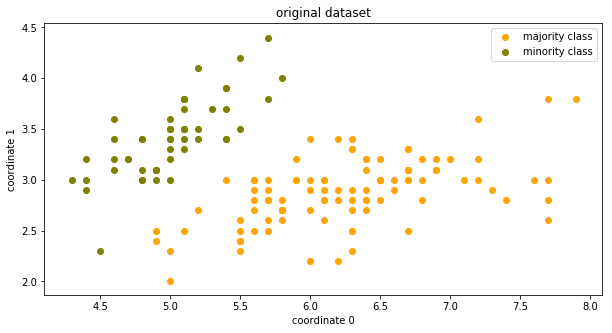

In [3]:
plt.figure(figsize=(10, 5))
plt.scatter(X[y == 0][:,0], X[y == 0][:,1], label='majority class', c='orange')
plt.scatter(X[y == 1][:,0], X[y == 1][:,1], label='minority class', c='olive')
plt.title('original dataset')
plt.xlabel('coordinate 0')
plt.ylabel('coordinate 1')
plt.legend()

In [4]:
# printing the number of samples

print('majority class: %d' % np.sum(y == 0))
print('minority class: %d' % np.sum(y == 1))

majority class: 100
minority class: 50


## Oversampling

The oversampling is carried out by instantiating any oversampler implemented in the package and calling the ```sample``` function.

In [5]:
oversampler= sv.distance_SMOTE()
X_samp, y_samp= oversampler.sample(X, y)

2019-06-11 18:18:21,998:INFO:distance_SMOTE: Running sampling via ('distance_SMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'n_jobs': 1}")


## Illustrating the oversampled dataset

The oversampled dataset is illustrated by printing the number of samples after oversampling. The newly generated samples can be filtered by removing the first ```len(X)``` elements of the oversampled dataset. Note that this filtering works only with *extensive* techniques, namely, with oversamplers which only add samples to the dataset. There are multiple oversamplers which also remove noisy samples, with these oversamplers there is no way to filter newly generated samples.

In [6]:
# printing the number of samples
print('majority class: %d' % np.sum(y_samp == 0))
print('minority class: %d' % np.sum(y_samp == 1))

majority class: 100
minority class: 100


In [7]:
# filtering new samples
X_samp, y_samp= X_samp[len(X):], y_samp[len(y):]

In [8]:
# printing the number of new samples
print('majority new samples: %d' % np.sum(y_samp == 0))
print('minority new samples: %d' % np.sum(y_samp == 1))

majority new samples: 0
minority new samples: 50


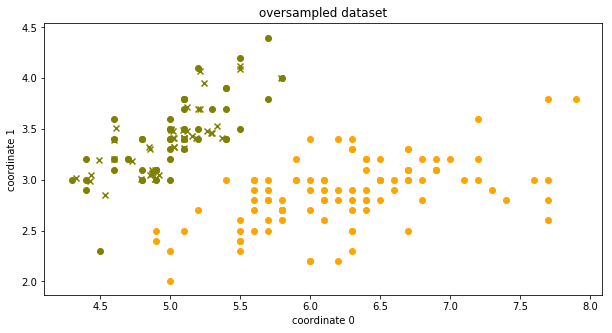

In [9]:
plt.figure(figsize=(10, 5))

plt.scatter(X[y == 0][:,0], X[y == 0][:,1], label='majority class', c='orange', marker='o')
plt.scatter(X[y == 1][:,0], X[y == 1][:,1], label='minority class', c='olive', marker='o')
plt.scatter(X_samp[y_samp == 1][:,0], X_samp[y_samp == 1][:,1], label='new minority samples', c='olive', marker='x')
plt.title('oversampled dataset')
plt.xlabel('coordinate 0')
plt.ylabel('coordinate 1')
plt.show()

## Illustrating all oversampling techniques

In this section, we illustrate the output of all oversampling techniques with default parameters on the ```iris0``` dataset.

In [10]:
oversamplers= sv.get_all_oversamplers()

2019-06-11 18:18:22,558:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'n_jobs': 1}")


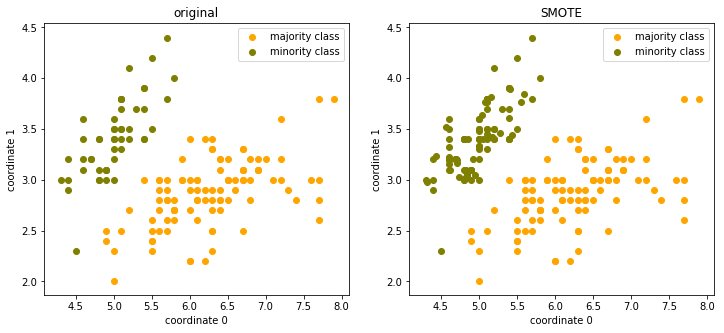

2019-06-11 18:18:22,793:INFO:SMOTE_TomekLinks: Running sampling via ('SMOTE_TomekLinks', "{'proportion': 1.0, 'n_neighbors': 5, 'n_jobs': 1}")
2019-06-11 18:18:22,794:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'n_jobs': 1}")
2019-06-11 18:18:22,796:INFO:TomekLinkRemoval: Running noise removal via TomekLinkRemoval


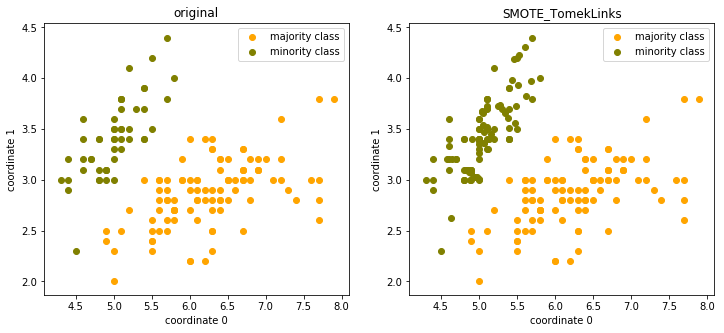

2019-06-11 18:18:23,054:INFO:SMOTE_ENN: Running sampling via ('SMOTE_ENN', "{'proportion': 1.0, 'n_neighbors': 5, 'n_jobs': 1}")
2019-06-11 18:18:23,055:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'n_jobs': 1}")
2019-06-11 18:18:23,056:INFO:EditedNearestNeighbors: Running noise removal via EditedNearestNeighbors


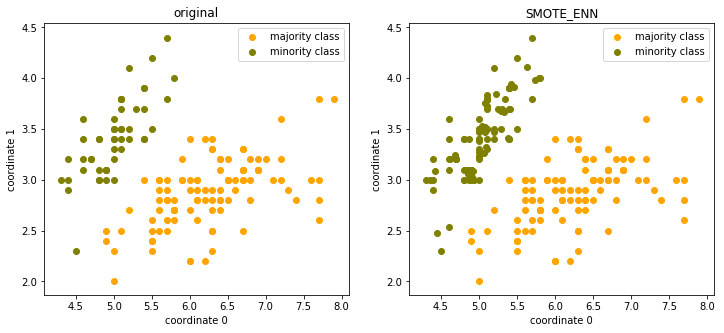

2019-06-11 18:18:23,287:INFO:Borderline_SMOTE1: Running sampling via ('Borderline_SMOTE1', "{'proportion': 1.0, 'n_neighbors': 5, 'k_neighbors': 5, 'n_jobs': 1}")
2019-06-11 18:18:23,290:INFO:Borderline_SMOTE1: No samples in danger


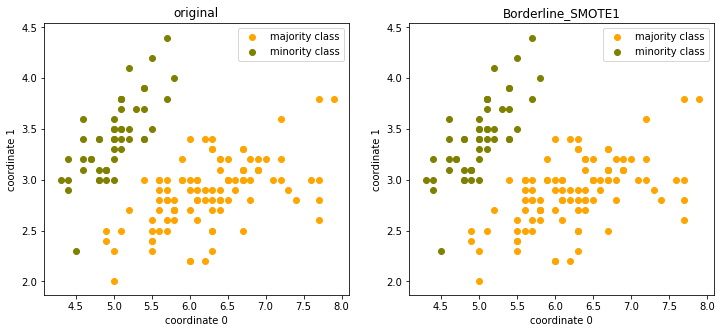

2019-06-11 18:18:23,556:INFO:Borderline_SMOTE2: Running sampling via ('Borderline_SMOTE2', "{'proportion': 1.0, 'n_neighbors': 5, 'k_neighbors': 5, 'n_jobs': 1}")
2019-06-11 18:18:23,560:INFO:Borderline_SMOTE2: No samples in danger


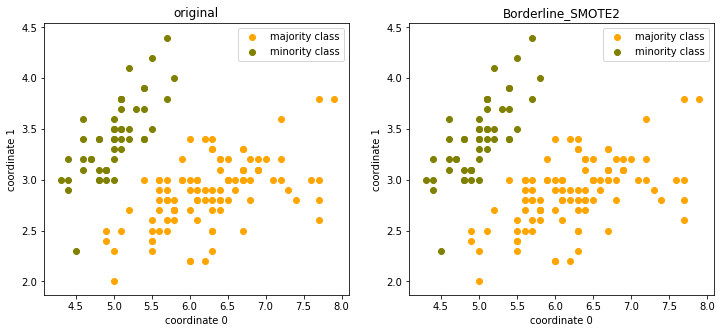

2019-06-11 18:18:23,802:INFO:ADASYN: Running sampling via ('ADASYN', "{'n_neighbors': 5, 'd_th': 0.9, 'beta': 1.0, 'n_jobs': 1}")
/home/gykovacs/workspaces/smote_variants/smote_variants/_smote_variants.py:1908: RuntimeWarning: invalid value encountered in true_divide
  r= r/sum(r)
/home/gykovacs/workspaces/smote_variants/smote_variants/_smote_variants.py:1925: RuntimeWarning: invalid value encountered in less
  base_indices= np.random.choice(list(range(len(X_min))), size=int(num_to_sample), p=r)


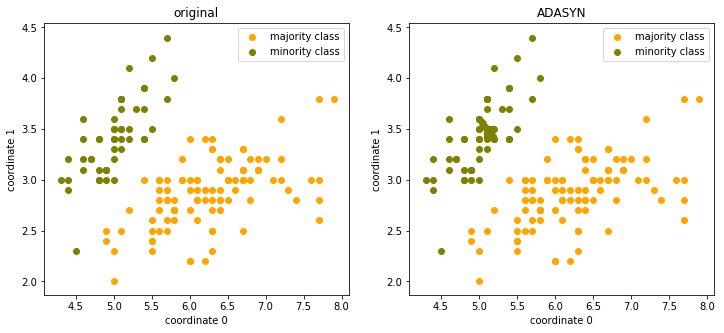

2019-06-11 18:18:24,056:INFO:AHC: Running sampling via ('AHC', "{'strategy': 'min', 'n_jobs': 1}")


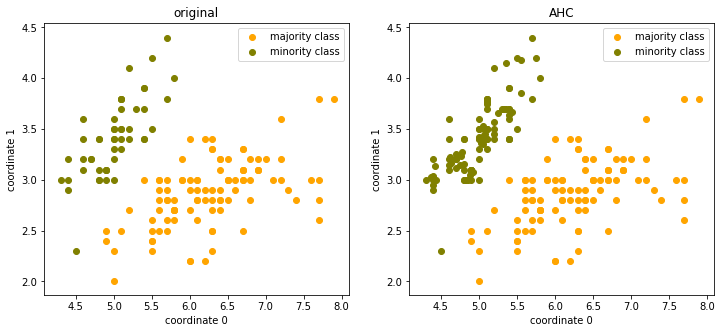

2019-06-11 18:18:24,410:INFO:LLE_SMOTE: Running sampling via ('LLE_SMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'n_components': 2, 'n_jobs': 1}")


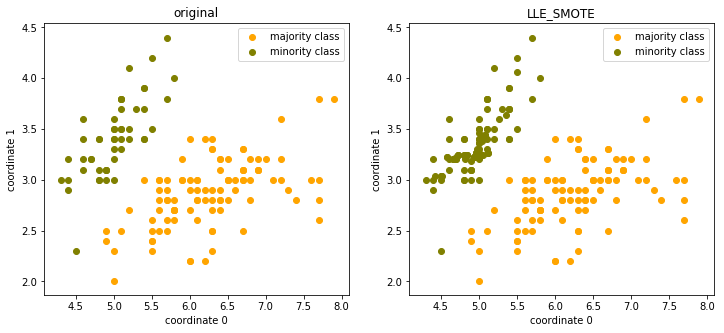

2019-06-11 18:18:24,925:INFO:distance_SMOTE: Running sampling via ('distance_SMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'n_jobs': 1}")


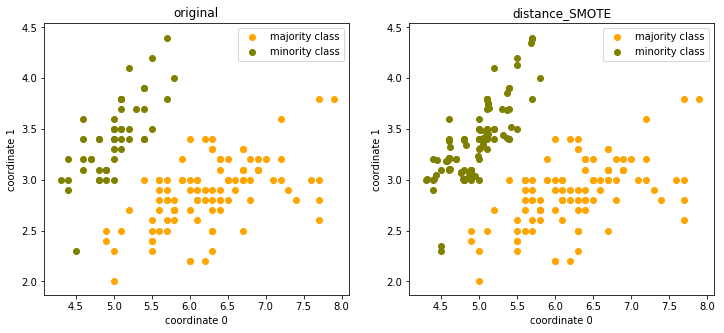

2019-06-11 18:18:25,161:INFO:SMMO: Running sampling via ('SMMO', "{'proportion': 1.0, 'n_neighbors': 5, 'ensemble': [QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,\n               store_covariance=False, store_covariances=None, tol=0.0001), DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,\n            max_features=None, max_leaf_nodes=None,\n            min_impurity_decrease=0.0, min_impurity_split=None,\n            min_samples_leaf=1, min_samples_split=2,\n            min_weight_fraction_leaf=0.0, presort=False, random_state=None,\n            splitter='best'), GaussianNB(priors=None, var_smoothing=1e-09)], 'n_jobs': 1}")
2019-06-11 18:18:25,406:WARNING:SMMO: Not enough minority samples selected 0


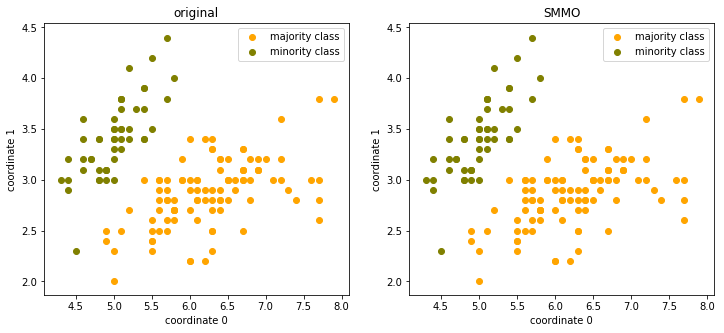

2019-06-11 18:18:25,658:INFO:polynom_fit_SMOTE: Running sampling via ('polynom_fit_SMOTE', "{'proportion': 1.0, 'topology': 'star'}")


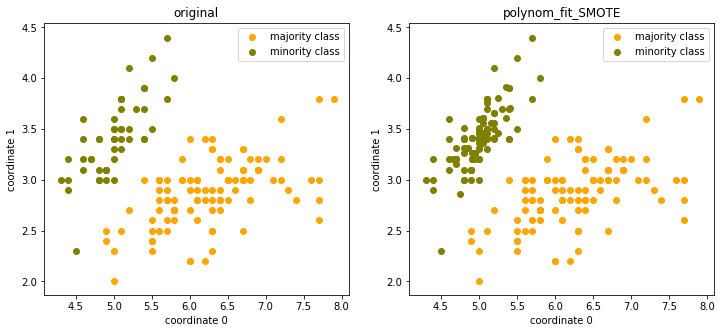

2019-06-11 18:18:25,890:INFO:Stefanowski: Running sampling via ('Stefanowski', "{'strategy': 'weak_amp', 'n_jobs': 1}")
2019-06-11 18:18:25,895:WARNING:Stefanowski: no samples added


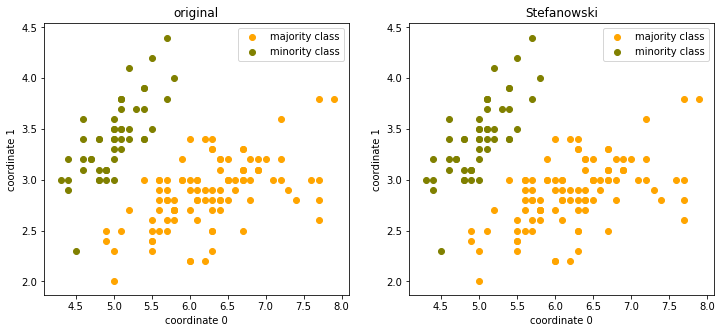

2019-06-11 18:18:26,116:INFO:ADOMS: Running sampling via ('ADOMS', "{'proportion': 1.0, 'n_neighbors': 5, 'n_jobs': 1}")


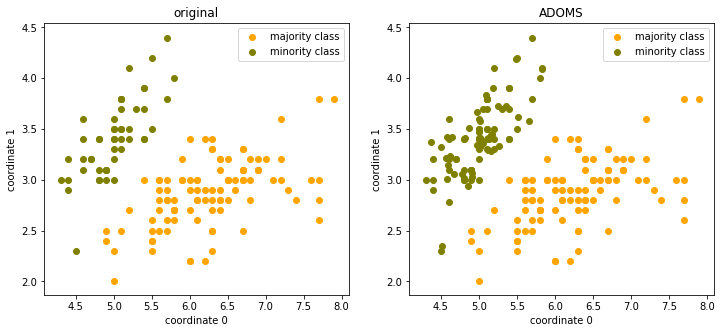

2019-06-11 18:18:26,508:INFO:Safe_Level_SMOTE: Running sampling via ('Safe_Level_SMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'n_jobs': 1}")


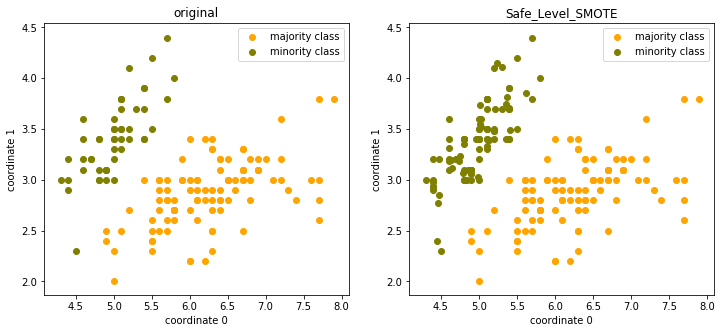

2019-06-11 18:18:26,734:INFO:MSMOTE: Running sampling via ('MSMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'n_jobs': 1}")


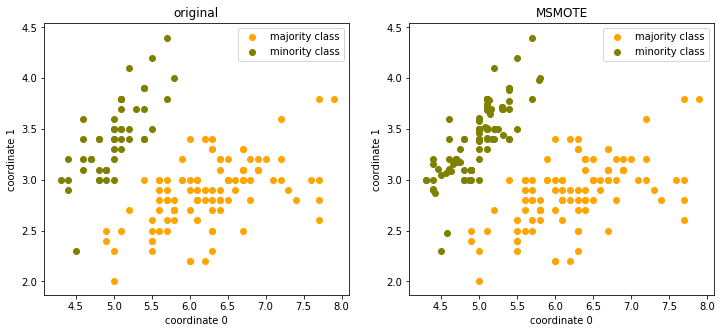

2019-06-11 18:18:26,952:INFO:DE_oversampling: Running sampling via ('DE_oversampling', "{'proportion': 1.0, 'n_neighbors': 5, 'crossover_rate': 0.5, 'similarity_threshold': 0.5, 'n_clusters': 30, 'n_jobs': 1}")


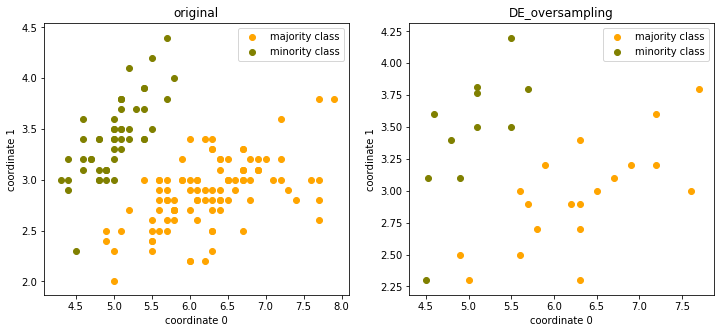

2019-06-11 18:18:27,317:INFO:SMOBD: Running sampling via ('SMOBD', "{'proportion': 1.0, 'eta1': 0.5, 't': 1.8, 'min_samples': 5, 'max_eps': 1.0, 'n_jobs': 1}")


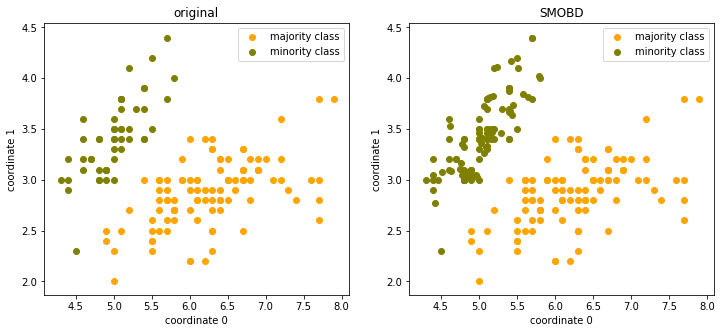

2019-06-11 18:18:27,606:INFO:SUNDO: Running sampling via ('SUNDO', "{'n_jobs': 1}")


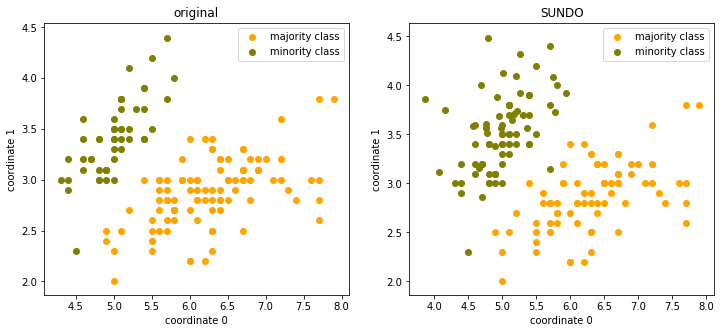

2019-06-11 18:18:28,103:INFO:MSYN: Running sampling via ('MSYN', "{'pressure': 1.5, 'n_neighbors': 5, 'n_jobs': 1}")
2019-06-11 18:18:28,104:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 1.5, 'n_neighbors': 5, 'n_jobs': 1}")


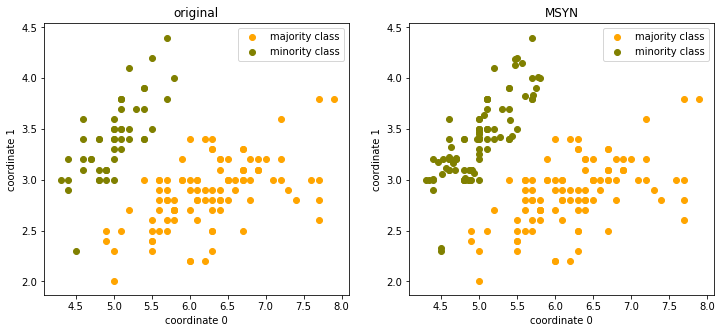

2019-06-11 18:18:28,383:INFO:SVM_balance: Running sampling via ('SVM_balance', "{'proportion': 1.0, 'n_neighbors': 5, 'n_jobs': 1}")
2019-06-11 18:18:28,383:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'n_jobs': 1}")
2019-06-11 18:18:28,386:INFO:SVM_balance: Evaluating SVM with C=0.010000
2019-06-11 18:18:28,411:INFO:SVM_balance: Evaluating SVM with C=0.100000
2019-06-11 18:18:28,418:INFO:SVM_balance: Evaluating SVM with C=1.000000
2019-06-11 18:18:28,424:INFO:SVM_balance: Evaluating SVM with C=10.000000


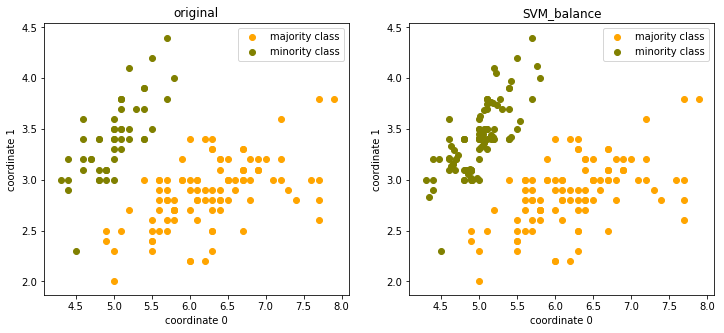

2019-06-11 18:18:28,668:INFO:TRIM_SMOTE: Running sampling via ('TRIM_SMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'min_precision': 0.3, 'n_jobs': 1}")
2019-06-11 18:18:28,669:INFO:TRIM_SMOTE: do the trimming process
2019-06-11 18:18:28,672:INFO:TRIM_SMOTE: do the sampling


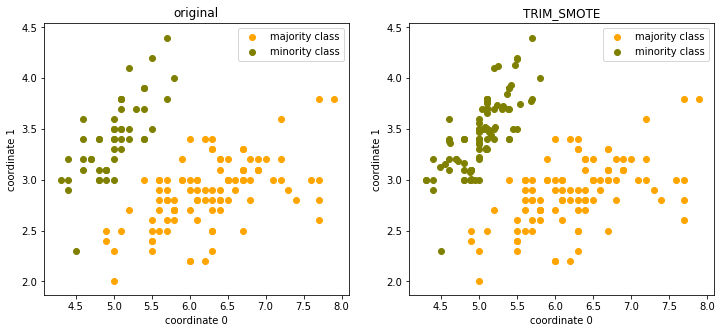

2019-06-11 18:18:28,908:INFO:SMOTE_RSB: Running sampling via ('SMOTE_RSB', "{'proportion': 2.0, 'n_neighbors': 5, 'n_jobs': 1}")
2019-06-11 18:18:28,909:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 2.0, 'n_neighbors': 5, 'n_jobs': 1}")


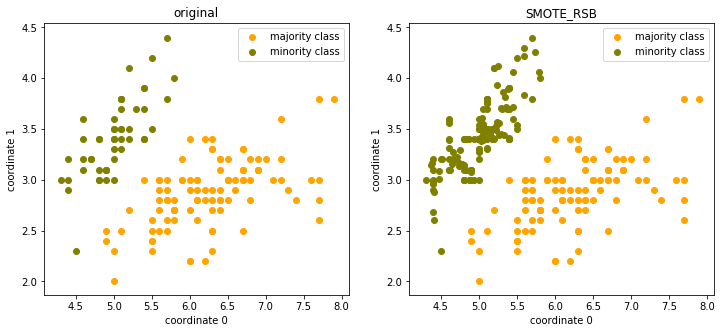

2019-06-11 18:18:29,133:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 1.0, 'n_neighbors': 5, 'L': 5, 'theta': 1.0, 'n_jobs': 1}")


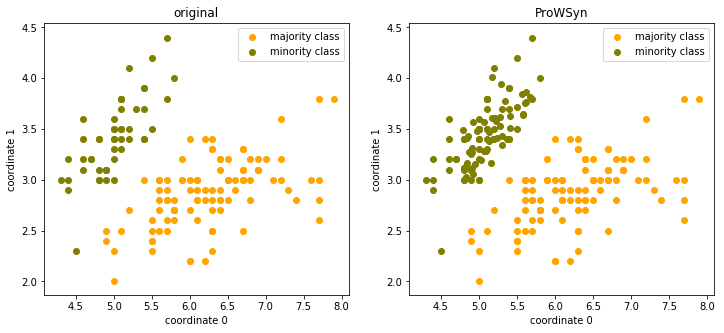

2019-06-11 18:18:29,369:INFO:SL_graph_SMOTE: Running sampling via ('SL_graph_SMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'n_jobs': 1}")
2019-06-11 18:18:29,372:INFO:Borderline_SMOTE1: Running sampling via ('Borderline_SMOTE1', "{'proportion': 1.0, 'n_neighbors': 5, 'k_neighbors': 5, 'n_jobs': 1}")
2019-06-11 18:18:29,378:INFO:Borderline_SMOTE1: No samples in danger


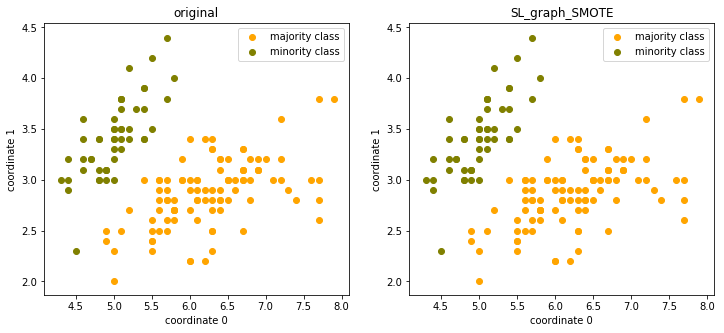

2019-06-11 18:18:29,852:INFO:NRSBoundary_SMOTE: Running sampling via ('NRSBoundary_SMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'w': 0.005, 'n_jobs': 1}")


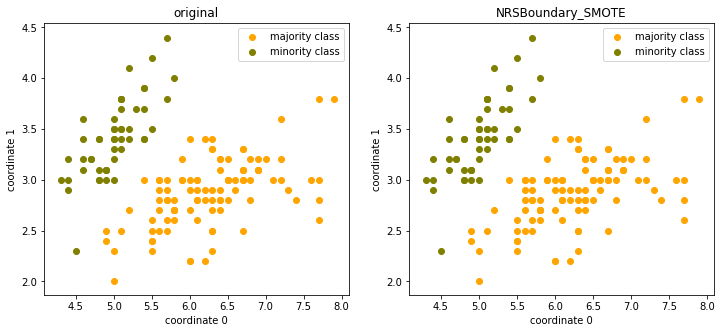

2019-06-11 18:18:30,232:INFO:LVQ_SMOTE: Running sampling via ('LVQ_SMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'n_clusters': 10, 'n_jobs': 1}")


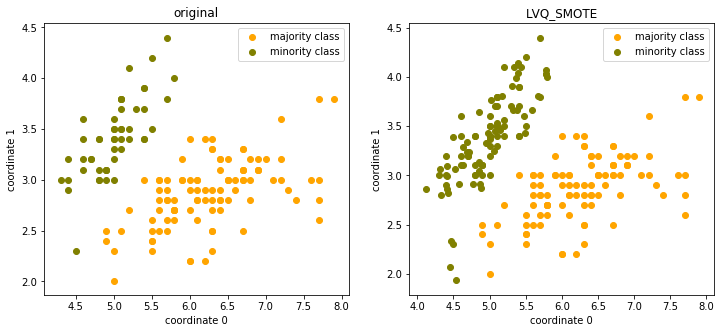

2019-06-11 18:18:30,709:INFO:SOI_CJ: Running sampling via ('SOI_CJ', "{'proportion': 1.0, 'n_neighbors': 5, 'method': 'interpolation', 'n_jobs': 1}")
2019-06-11 18:18:30,710:INFO:SOI_CJ: Executing clustering
2019-06-11 18:18:30,745:INFO:SOI_CJ: Executing sample generation


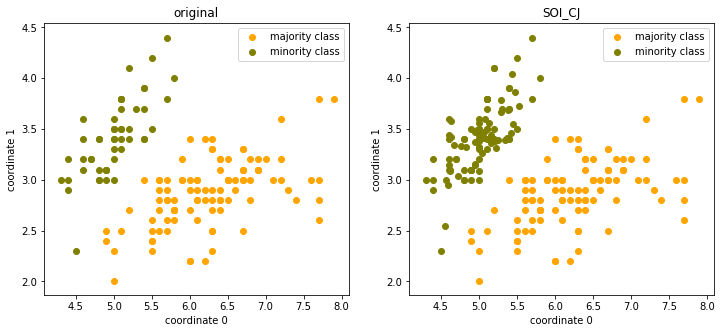

2019-06-11 18:18:31,001:INFO:ROSE: Running sampling via ('ROSE', "{'proportion': 1.0}")


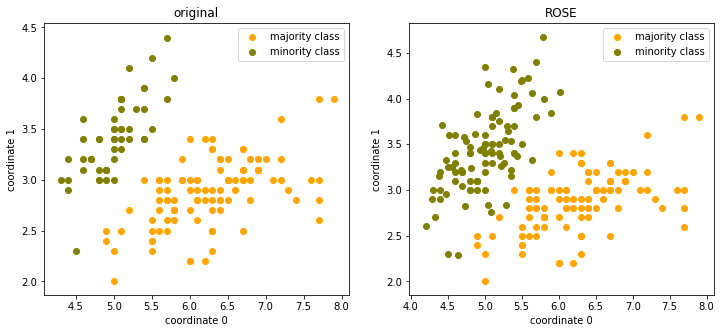

2019-06-11 18:18:31,269:INFO:SMOTE_OUT: Running sampling via ('SMOTE_OUT', "{'proportion': 1.0, 'n_neighbors': 5, 'n_jobs': 1}")


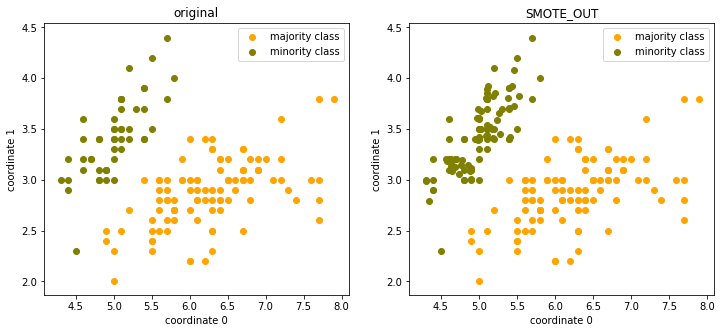

2019-06-11 18:18:31,505:INFO:SMOTE_Cosine: Running sampling via ('SMOTE_Cosine', "{'proportion': 1.0, 'n_neighbors': 5, 'n_jobs': 1}")


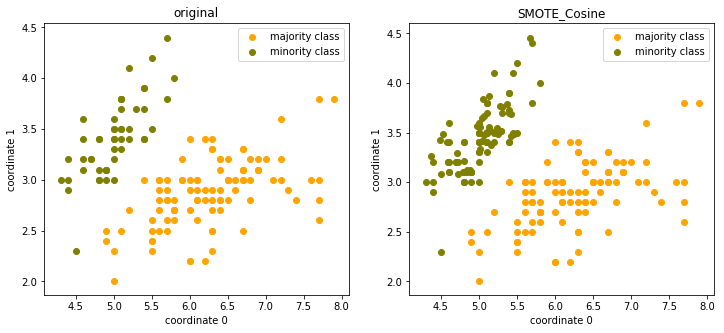

2019-06-11 18:18:31,763:INFO:Selected_SMOTE: Running sampling via ('Selected_SMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'perc_sign_attr': 0.5, 'n_jobs': 1}")


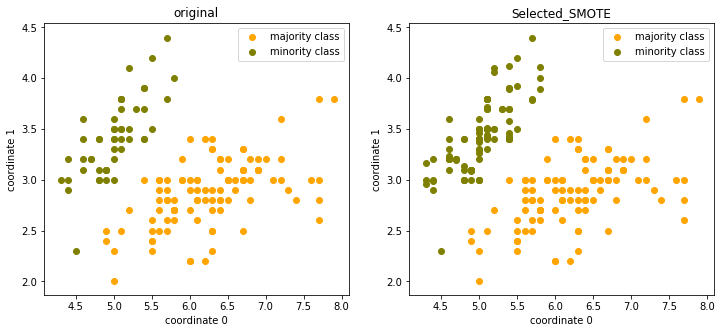

2019-06-11 18:18:32,009:INFO:LN_SMOTE: Running sampling via ('LN_SMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'n_jobs': 1}")


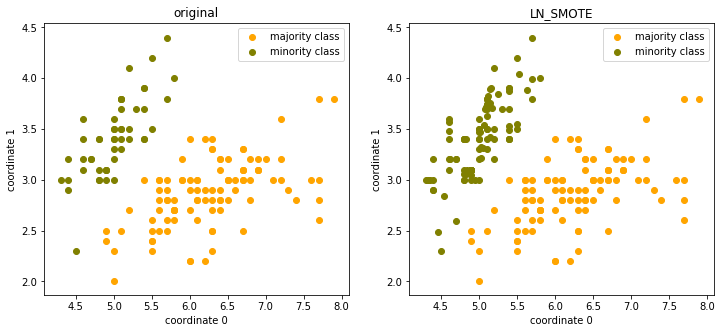

2019-06-11 18:18:32,280:INFO:MWMOTE: Running sampling via ('MWMOTE', "{'proportion': 1.0, 'k1': 5, 'k2': 5, 'k3': 5, 'M': 10, 'cf_th': 5.0, 'cmax': 10.0, 'n_jobs': 1}")
2019-06-11 18:18:32,283:INFO:MWMOTE: computing closeness factors
2019-06-11 18:18:32,284:INFO:MWMOTE: computing information weights
2019-06-11 18:18:32,284:INFO:MWMOTE: do clustering


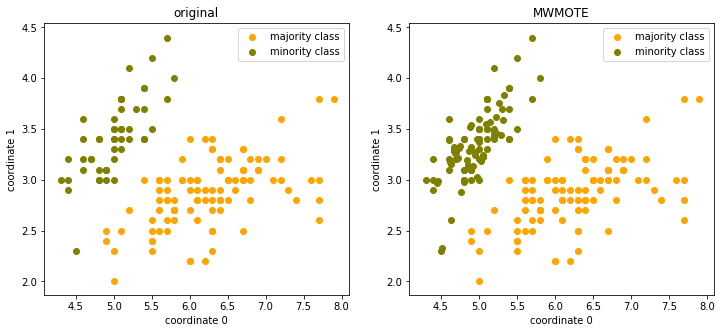

2019-06-11 18:18:32,568:INFO:PDFOS: Running sampling via ('PDFOS', "{'proportion': 1.0, 'n_jobs': 1}")
2019-06-11 18:18:32,743:INFO:PDFOS: Condition number of covariance matrix: 111.988367
2019-06-11 18:18:32,744:INFO:PDFOS: Input size: 50
2019-06-11 18:18:32,746:INFO:PDFOS: Input dim: 4
2019-06-11 18:18:32,747:INFO:PDFOS: Matrix rank of covariance matrix: 3
2019-06-11 18:18:32,748:INFO:PDFOS: The covariance matrix is singular, performing PCA to fix it
2019-06-11 18:18:32,749:INFO:PDFOS: dim: 4, rank: 3, size: 50
2019-06-11 18:18:32,750:INFO:PDFOS: Condition number of covariance matrix: 12.544570
2019-06-11 18:18:32,751:INFO:PDFOS: Input size: 50
2019-06-11 18:18:32,752:INFO:PDFOS: Input dim: 2
2019-06-11 18:18:32,752:INFO:PDFOS: Matrix rank of covariance matrix: 2
2019-06-11 18:18:32,875:INFO:PDFOS: Determinant: 0.063338
2019-06-11 18:18:33,741:INFO:PDFOS: best sigma found: 0.615848


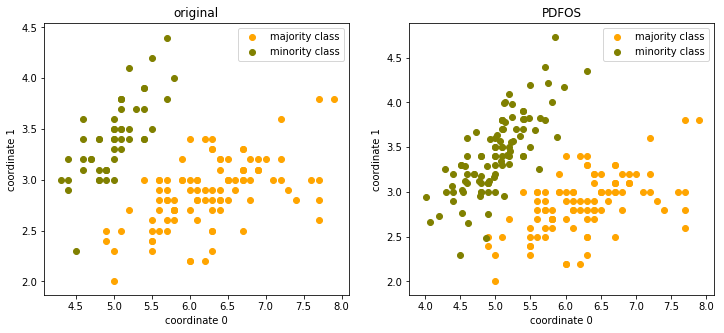

2019-06-11 18:18:34,039:INFO:IPADE_ID: Running sampling via ('IPADE_ID', "{'F': 0.1, 'G': 0.1, 'OT': 20, 'max_it': 40, 'n_jobs': 1, 'dt_classifier': DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,\n            max_features=None, max_leaf_nodes=None,\n            min_impurity_decrease=0.0, min_impurity_split=None,\n            min_samples_leaf=1, min_samples_split=2,\n            min_weight_fraction_leaf=0.0, presort=False, random_state=2,\n            splitter='best'), 'base_classifier': DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,\n            max_features=None, max_leaf_nodes=None,\n            min_impurity_decrease=0.0, min_impurity_split=None,\n            min_samples_leaf=1, min_samples_split=2,\n            min_weight_fraction_leaf=0.0, presort=False, random_state=2,\n            splitter='best')}")
2019-06-11 18:18:34,040:INFO:IPADE_ID: Initialization
2019-06-11 18:18:34,042:INFO:IPADE_ID: Size of validation set 150
2019

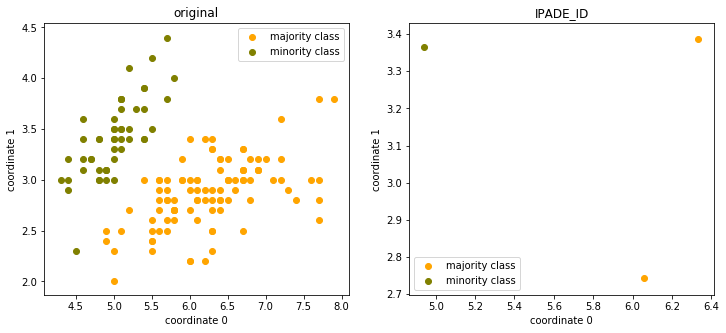

2019-06-11 18:18:35,348:INFO:RWO_sampling: Running sampling via ('RWO_sampling', "{'proportion': 1.0, 'n_jobs': 1}")


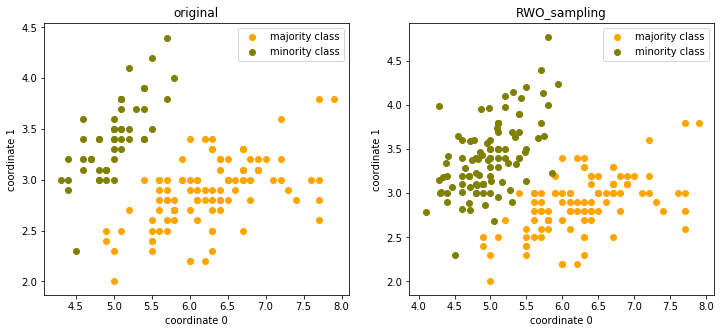

2019-06-11 18:18:35,590:INFO:NEATER: Running sampling via ('NEATER', "{'proportion': 1.0, 'smote_n_neighbors': 5, 'b': 5, 'alpha': 0.1, 'h': 20, 'n_jobs': 1}")
2019-06-11 18:18:35,591:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'n_jobs': 1}")
2019-06-11 18:18:35,594:INFO:ADASYN: Running sampling via ('ADASYN', "{'n_neighbors': 5, 'd_th': 0.9, 'beta': 1.0, 'n_jobs': 1}")
/home/gykovacs/workspaces/smote_variants/smote_variants/_smote_variants.py:1908: RuntimeWarning: invalid value encountered in true_divide
  r= r/sum(r)
/home/gykovacs/workspaces/smote_variants/smote_variants/_smote_variants.py:1925: RuntimeWarning: invalid value encountered in less
  base_indices= np.random.choice(list(range(len(X_min))), size=int(num_to_sample), p=r)
/home/gykovacs/workspaces/smote_variants/smote_variants/_smote_variants.py:6757: RuntimeWarning: divide by zero encountered in true_divide
  dm= 1.0/dm


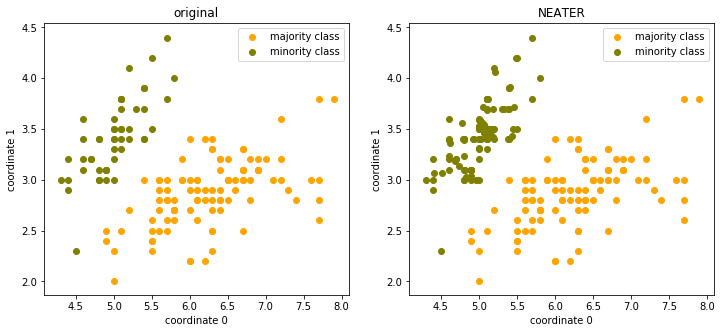

2019-06-11 18:18:36,018:INFO:DEAGO: Running sampling via ('DEAGO', "{'proportion': 1.0, 'n_neighbors': 5, 'e': 100, 'h': 0.3, 'sigma': 0.1, 'n_jobs': 1}")
Using TensorFlow backend.
2019-06-11 18:19:18,322:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'n_jobs': 1}")
2019-06-11 18:19:18,325:INFO:DEAGO: Input dimension: 4, encoding dimension: 2


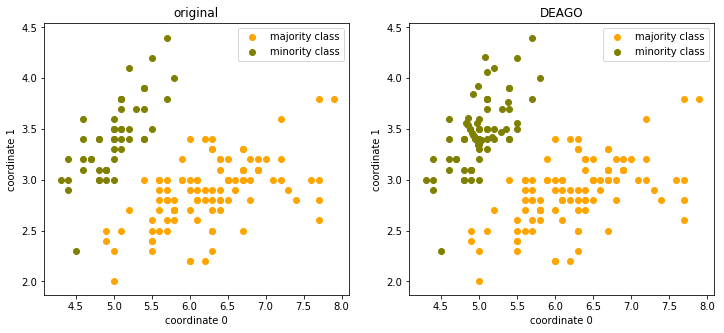

2019-06-11 18:19:23,608:INFO:Gazzah: Running sampling via ('Gazzah', "{'proportion': 1.0, 'n_components': 2, 'n_jobs': 1}")
2019-06-11 18:19:23,609:INFO:polynom_fit_SMOTE: Running sampling via ('polynom_fit_SMOTE', "{'proportion': 1.0, 'topology': 'star'}")
2019-06-11 18:19:23,612:INFO:Gazzah: Removing 33 majority samples


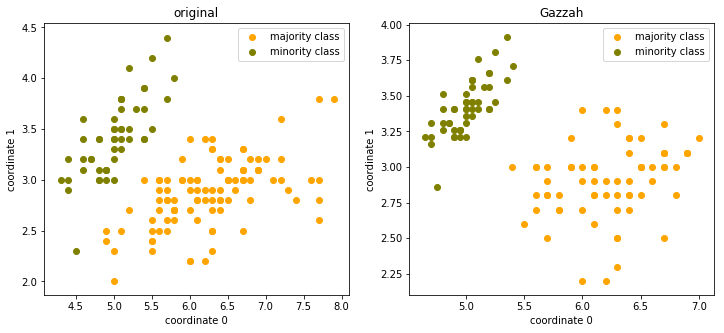

2019-06-11 18:19:23,933:INFO:MCT: Running sampling via ('MCT', "{'proportion': 1.0, 'n_jobs': 1}")


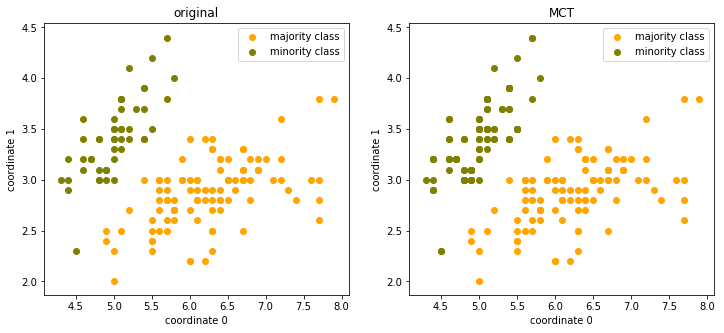

2019-06-11 18:19:24,181:INFO:ADG: Running sampling via ('ADG', "{'proportion': 1.0, 'kernel': 'inner', 'lam': 1.0, 'mu': 1.0, 'k': 12, 'gamma': 1.0, 'n_jobs': 1}")
2019-06-11 18:19:24,286:INFO:ADG: Starting iteration with q=50
2019-06-11 18:19:25,236:INFO:ADG: Starting iteration with q=25
2019-06-11 18:19:25,561:INFO:ADG: Starting iteration with q=12
2019-06-11 18:19:25,925:INFO:ADG: Starting iteration with q=6
2019-06-11 18:19:26,194:INFO:ADG: Starting iteration with q=3


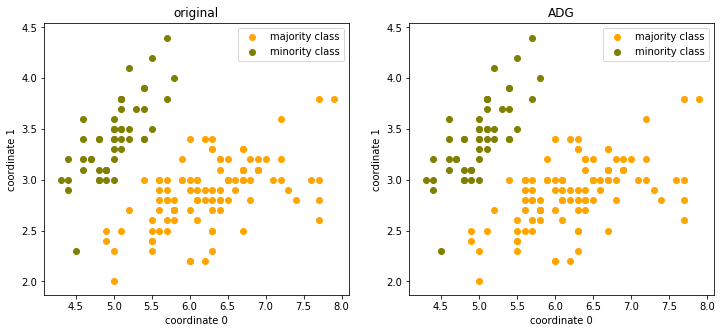

2019-06-11 18:19:26,676:INFO:SMOTE_IPF: Running sampling via ('SMOTE_IPF', "{'proportion': 1.0, 'n_neighbors': 5, 'n_folds': 9, 'k': 3, 'p': 0.01, 'voting': 'majority', 'n_jobs': 1, 'classifier': DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,\n            max_features=None, max_leaf_nodes=None,\n            min_impurity_decrease=0.0, min_impurity_split=None,\n            min_samples_leaf=1, min_samples_split=2,\n            min_weight_fraction_leaf=0.0, presort=False, random_state=None,\n            splitter='best')}")
2019-06-11 18:19:26,677:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'n_jobs': 1}")
2019-06-11 18:19:26,685:INFO:SMOTE_IPF: Removing 0 elements
2019-06-11 18:19:26,690:INFO:SMOTE_IPF: Removing 0 elements
2019-06-11 18:19:26,695:INFO:SMOTE_IPF: Removing 0 elements


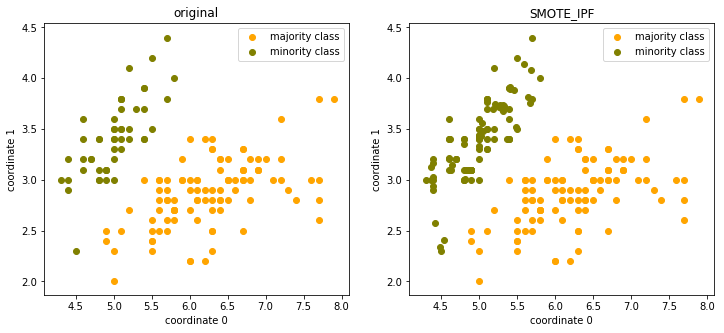

2019-06-11 18:19:26,927:INFO:KernelADASYN: Running sampling via ('KernelADASYN', "{'proportion': 1.0, 'k': 5, 'h': 1.0, 'n_jobs': 1}")
2019-06-11 18:19:26,929:INFO:KernelADASYN: majority score is 0 for all or all but one minority samples


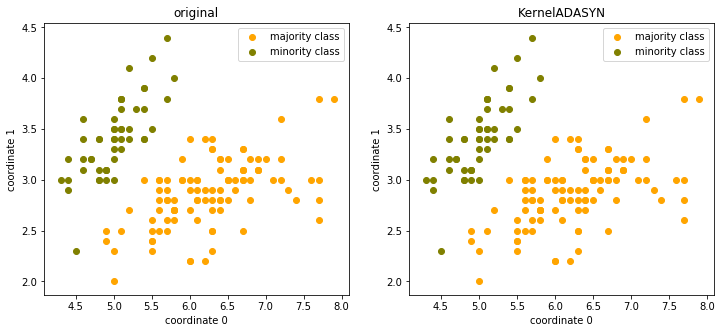

2019-06-11 18:19:27,182:INFO:MOT2LD: Running sampling via ('MOT2LD', "{'proportion': 1.0, 'n_components': 2, 'k': 5, 'd_cut': 'auto', 'n_jobs': 1}")
2019-06-11 18:19:27,183:INFO:MOT2LD: starting TSNE
2019-06-11 18:19:28,086:INFO:MOT2LD: TSNE finished
/home/gykovacs/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


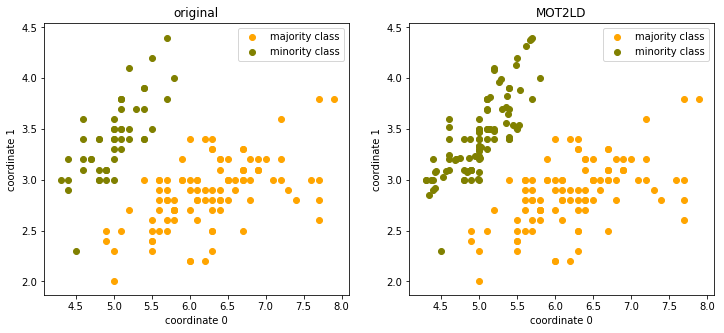

2019-06-11 18:19:29,717:INFO:V_SYNTH: Running sampling via ('V_SYNTH', "{'proportion': 1.0, 'n_components': 3, 'n_jobs': 1}")


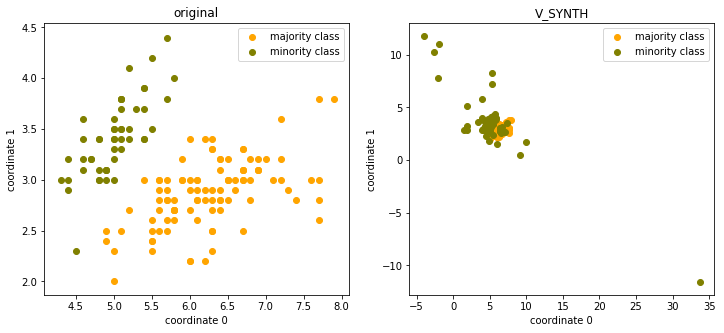

2019-06-11 18:19:30,676:INFO:OUPS: Running sampling via ('OUPS', "{'proportion': 1.0, 'n_jobs': 1}")


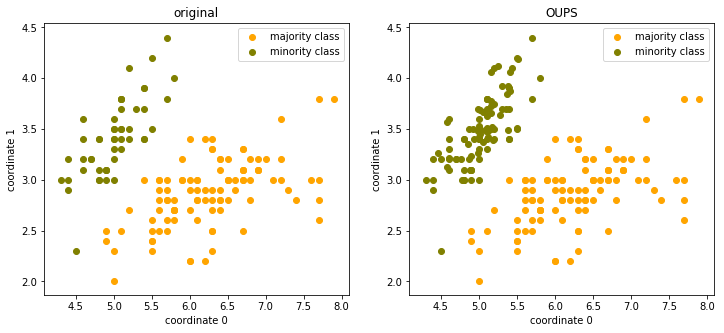

2019-06-11 18:19:30,908:INFO:SMOTE_D: Running sampling via ('SMOTE_D', "{'proportion': 1.0, 'k': 3, 'n_jobs': 1}")


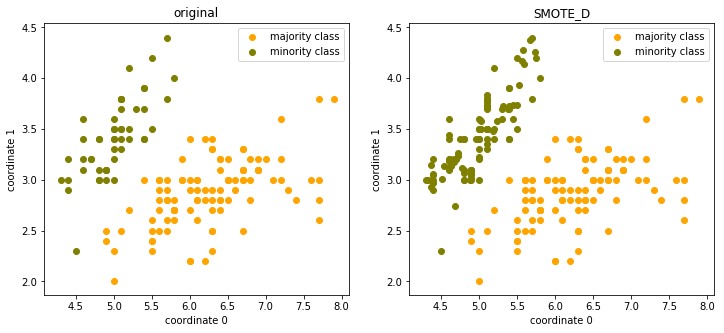

2019-06-11 18:19:31,146:INFO:SMOTE_PSO: Running sampling via ('SMOTE_PSO', "{'k': 3, 'eps': 0.05, 'n_pop': 10, 'w': 1.0, 'c1': 2.0, 'c2': 2.0, 'num_it': 10, 'n_jobs': 1}")
2019-06-11 18:19:31,369:INFO:SMOTE_PSO: Iteration 0
2019-06-11 18:19:31,393:INFO:SMOTE_PSO: Iteration 1
2019-06-11 18:19:31,417:INFO:SMOTE_PSO: Iteration 2
2019-06-11 18:19:31,440:INFO:SMOTE_PSO: Iteration 3
2019-06-11 18:19:31,463:INFO:SMOTE_PSO: Iteration 4
2019-06-11 18:19:31,485:INFO:SMOTE_PSO: Iteration 5
2019-06-11 18:19:31,513:INFO:SMOTE_PSO: Iteration 6
2019-06-11 18:19:31,537:INFO:SMOTE_PSO: Iteration 7
2019-06-11 18:19:31,560:INFO:SMOTE_PSO: Iteration 8
2019-06-11 18:19:31,585:INFO:SMOTE_PSO: Iteration 9


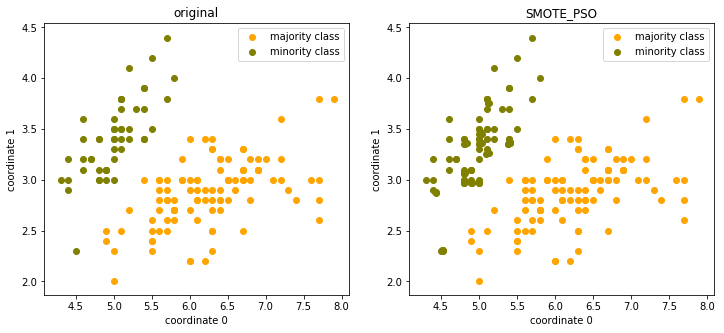

2019-06-11 18:19:31,916:INFO:CURE_SMOTE: Running sampling via ('CURE_SMOTE', "{'proportion': 1.0, 'n_clusters': 5, 'noise_th': 2, 'n_jobs': 1}")


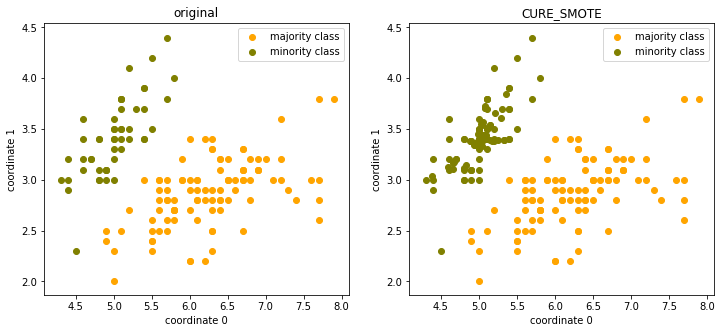

2019-06-11 18:19:32,152:INFO:SOMO: Running sampling via ('SOMO', "{'proportion': 1.0, 'n_grid': 10, 'sigma': 0.2, 'learning_rate': 0.5, 'n_iter': 100, 'n_jobs': 1}")


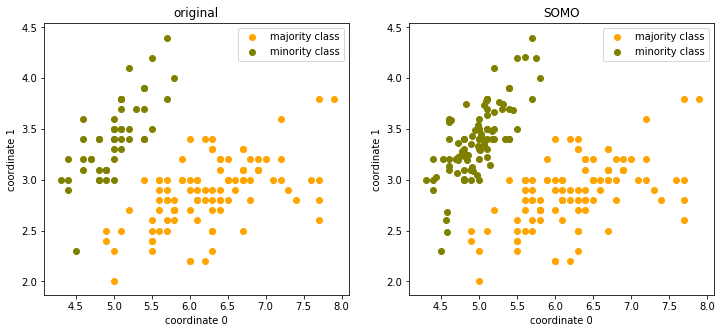

2019-06-11 18:19:32,557:INFO:ISOMAP_Hybrid: Running sampling via ('ISOMAP_Hybrid', "{'proportion': 1.0, 'n_neighbors': 5, 'n_components': 3, 'smote_n_neighbors': 5, 'n_jobs': 1}")
2019-06-11 18:19:35,093:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'n_jobs': 1}")
2019-06-11 18:19:35,096:INFO:NeighborhoodCleaningRule: Running noise removal via NeighborhoodCleaningRule


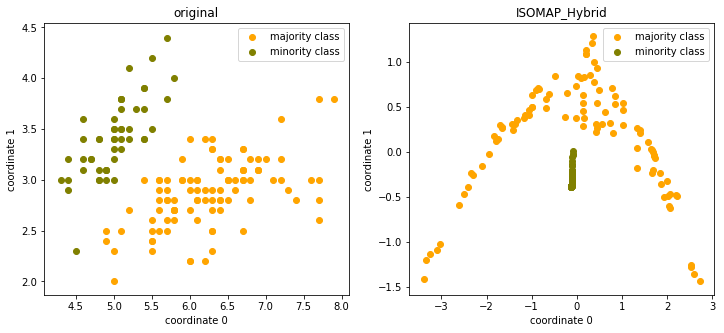

2019-06-11 18:19:35,456:INFO:CE_SMOTE: Running sampling via ('CE_SMOTE', "{'proportion': 1.0, 'h': 10, 'k': 5, 'alpha': 0.5, 'n_jobs': 1}")


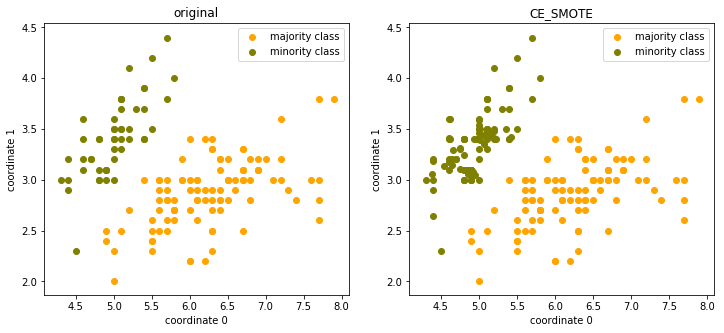

2019-06-11 18:19:35,892:INFO:Edge_Det_SMOTE: Running sampling via ('Edge_Det_SMOTE', "{'proportion': 1.0, 'k': 5, 'n_jobs': 1}")


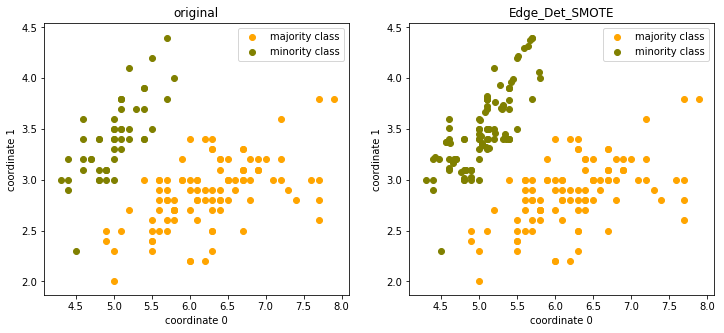

2019-06-11 18:19:36,151:INFO:CBSO: Running sampling via ('CBSO', "{'proportion': 1.0, 'n_neighbors': 5, 'C_p': 1.3, 'n_jobs': 1}")
/home/gykovacs/workspaces/smote_variants/smote_variants/_smote_variants.py:9644: RuntimeWarning: invalid value encountered in true_divide
  weights= weights/np.sum(weights)
/home/gykovacs/workspaces/smote_variants/smote_variants/_smote_variants.py:9693: RuntimeWarning: invalid value encountered in less
  idx= np.random.choice(np.arange(len(X_min)), p= weights)


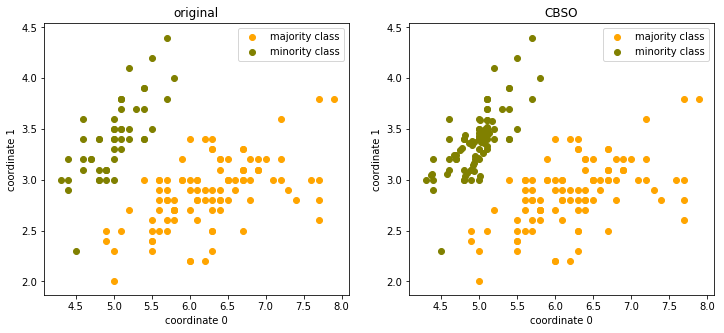

2019-06-11 18:19:36,387:INFO:E_SMOTE: Running sampling via ('E_SMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'min_features': 2, 'n_jobs': 1}")
2019-06-11 18:19:36,388:INFO:E_SMOTE: evaluating mask selection with features 2/4
2019-06-11 18:19:36,390:INFO:E_SMOTE: evaluating mask selection with features 3/4
2019-06-11 18:19:36,391:INFO:E_SMOTE: evaluating mask selection with features 3/4
2019-06-11 18:19:36,393:INFO:E_SMOTE: evaluating mask selection with features 3/4
2019-06-11 18:19:36,394:INFO:E_SMOTE: evaluating mask selection with features 3/4
2019-06-11 18:19:36,396:INFO:E_SMOTE: evaluating mask selection with features 2/4
2019-06-11 18:19:36,397:INFO:E_SMOTE: evaluating mask selection with features 3/4
2019-06-11 18:19:36,399:INFO:E_SMOTE: evaluating mask selection with features 3/4
2019-06-11 18:19:36,400:INFO:E_SMOTE: evaluating mask selection with features 3/4
2019-06-11 18:19:36,402:INFO:E_SMOTE: evaluating mask selection with features 2/4
2019-06-11 18:19:36,404:INFO:E_SMOTE

2019-06-11 18:19:36,533:INFO:E_SMOTE: evaluating mask selection with features 2/4
2019-06-11 18:19:36,535:INFO:E_SMOTE: evaluating mask selection with features 3/4
2019-06-11 18:19:36,536:INFO:E_SMOTE: evaluating mask selection with features 3/4
2019-06-11 18:19:36,538:INFO:E_SMOTE: evaluating mask selection with features 2/4
2019-06-11 18:19:36,540:INFO:E_SMOTE: evaluating mask selection with features 4/4
2019-06-11 18:19:36,542:INFO:E_SMOTE: evaluating mask selection with features 3/4
2019-06-11 18:19:36,543:INFO:E_SMOTE: evaluating mask selection with features 3/4
2019-06-11 18:19:36,545:INFO:E_SMOTE: evaluating mask selection with features 3/4
2019-06-11 18:19:36,546:INFO:E_SMOTE: evaluating mask selection with features 3/4
2019-06-11 18:19:36,548:INFO:E_SMOTE: evaluating mask selection with features 2/4
2019-06-11 18:19:36,549:INFO:E_SMOTE: evaluating mask selection with features 2/4
2019-06-11 18:19:36,550:INFO:E_SMOTE: evaluating mask selection with features 2/4
2019-06-11 18:19

2019-06-11 18:19:36,677:INFO:E_SMOTE: evaluating mask selection with features 2/4
2019-06-11 18:19:36,679:INFO:E_SMOTE: evaluating mask selection with features 2/4
2019-06-11 18:19:36,680:INFO:E_SMOTE: evaluating mask selection with features 3/4
2019-06-11 18:19:36,682:INFO:E_SMOTE: evaluating mask selection with features 3/4
2019-06-11 18:19:36,683:INFO:E_SMOTE: evaluating mask selection with features 3/4
2019-06-11 18:19:36,684:INFO:E_SMOTE: evaluating mask selection with features 2/4
2019-06-11 18:19:36,685:INFO:E_SMOTE: evaluating mask selection with features 3/4
2019-06-11 18:19:36,686:INFO:E_SMOTE: evaluating mask selection with features 2/4
2019-06-11 18:19:36,687:INFO:E_SMOTE: evaluating mask selection with features 3/4
2019-06-11 18:19:36,688:INFO:E_SMOTE: evaluating mask selection with features 4/4
2019-06-11 18:19:36,690:INFO:E_SMOTE: evaluating mask selection with features 2/4
2019-06-11 18:19:36,692:INFO:E_SMOTE: evaluating mask selection with features 2/4
2019-06-11 18:19

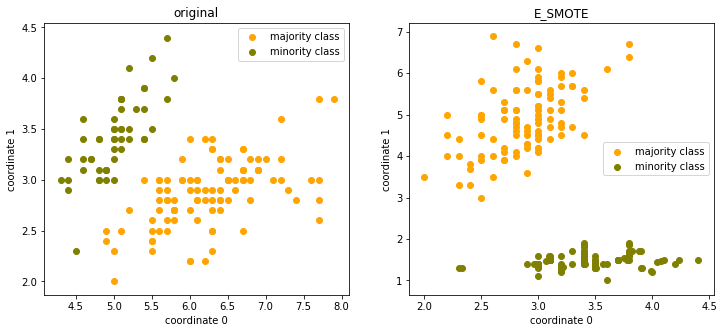

2019-06-11 18:19:37,000:INFO:DBSMOTE: Running sampling via ('DBSMOTE', "{'proportion': 1.0, 'eps': 0.8, 'min_samples': 3, 'n_jobs': 1}")


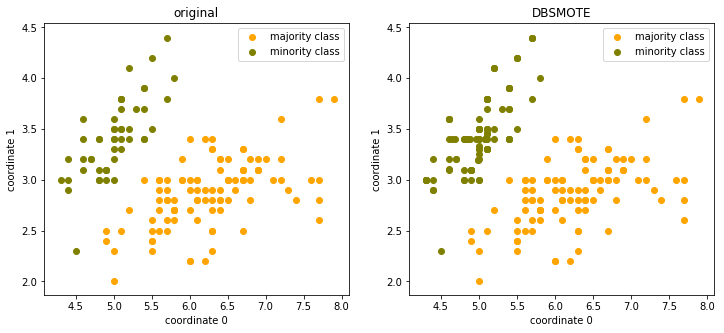

2019-06-11 18:19:37,288:INFO:ASMOBD: Running sampling via ('ASMOBD', "{'proportion': 1.0, 'min_samples': 3, 'eps': 0.8, 'eta': 0.5, 'T_1': 1.0, 'T_2': 1.0, 't_1': 4.0, 't_2': 4.0, 'a': 0.05, 'smoothing': 'linear', 'n_jobs': 1}")


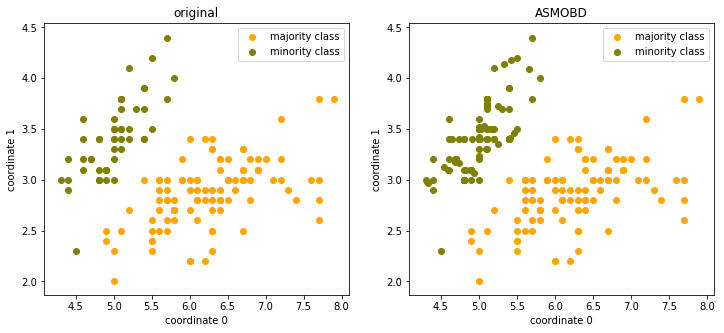

2019-06-11 18:19:37,646:INFO:Assembled_SMOTE: Running sampling via ('Assembled_SMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'pop': 2, 'thres': 0.3, 'n_jobs': 1}")
2019-06-11 18:19:37,649:WARNING:Assembled_SMOTE: X_border is empty


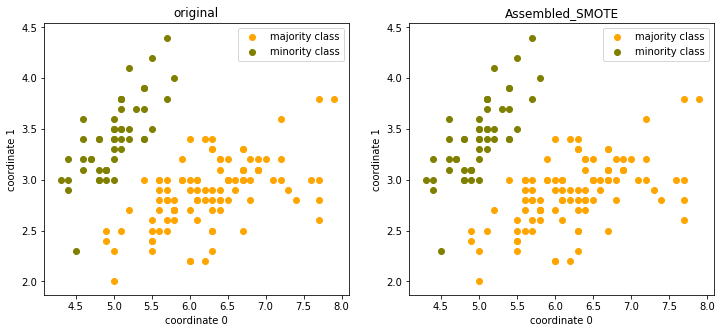

2019-06-11 18:19:37,913:INFO:SDSMOTE: Running sampling via ('SDSMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'n_jobs': 1}")


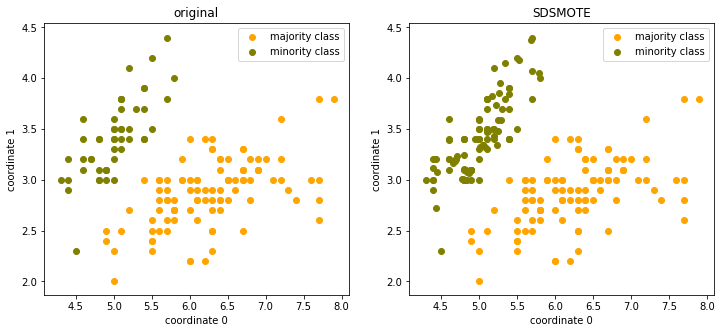

2019-06-11 18:19:38,170:INFO:DSMOTE: Running sampling via ('DSMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'rate': 0.1, 'n_step': 50, 'n_jobs': 1}")
/home/gykovacs/workspaces/smote_variants/smote_variants/_smote_variants.py:10813: RuntimeWarning: divide by zero encountered in log
  min_log_sum= np.sum(np.log(X_min), axis= 0)
/home/gykovacs/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:313: RuntimeWarning: divide by zero encountered in log
  log_a = np.log(a)
/home/gykovacs/workspaces/smote_variants/smote_variants/_smote_variants.py:10837: RuntimeWarning: divide by zero encountered in log
  new_min_log_sum= min_log_sum + np.log(gm)


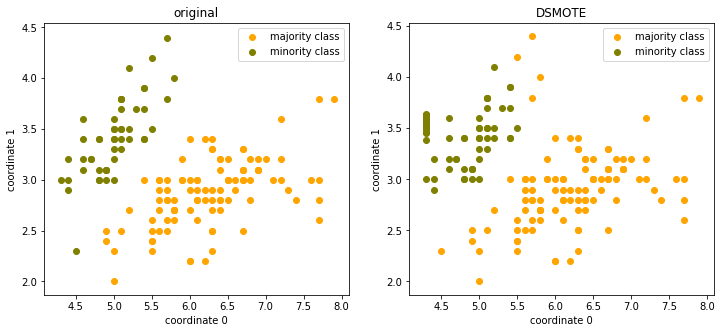

2019-06-11 18:19:38,812:INFO:G_SMOTE: Running sampling via ('G_SMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'method': 'linear', 'n_jobs': 1}")
/home/gykovacs/workspaces/smote_variants/smote_variants/_smote_variants.py:11019: RuntimeWarning: invalid value encountered in double_scalars
  thetas= np.array([np.arccos(np.abs(np.dot(P[n], H_l))/(np.linalg.norm(P[n])*np.linalg.norm(H_l))) for n in range(len(P))])


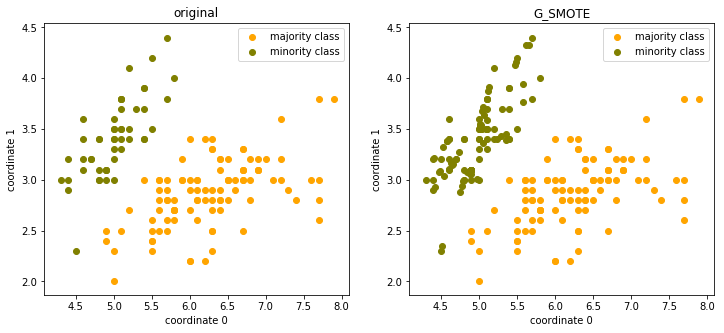

2019-06-11 18:19:39,665:INFO:NT_SMOTE: Running sampling via ('NT_SMOTE', "{'proportion': 1.0, 'n_jobs': 1}")


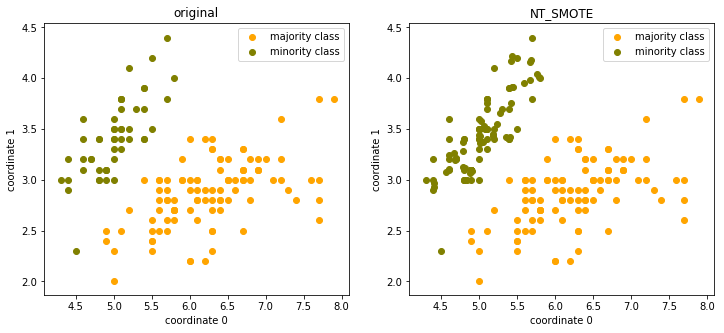

2019-06-11 18:19:39,948:INFO:Lee: Running sampling via ('Lee', "{'proportion': 1.0, 'n_neighbors': 5, 'rejection_level': 0.5, 'n_jobs': 1}")


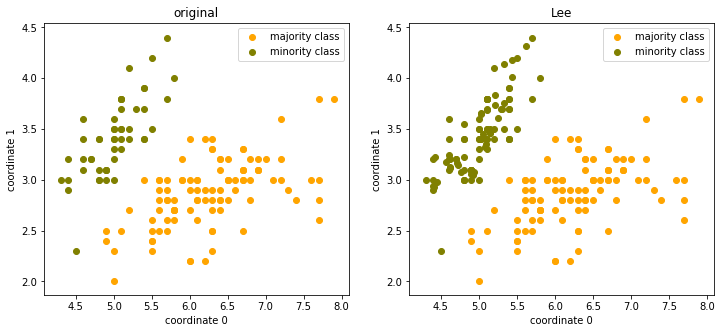

2019-06-11 18:19:40,213:INFO:SPY: Running sampling via ('SPY', "{'n_neighbors': 5, 'threshold': 0.5, 'n_jobs': 1}")


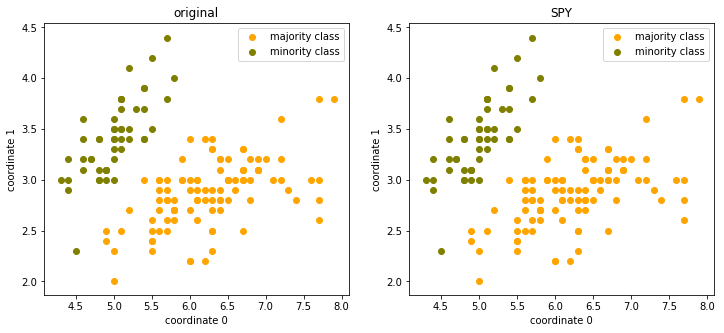

2019-06-11 18:19:40,471:INFO:SMOTE_PSOBAT: Running sampling via ('SMOTE_PSOBAT', "{'maxit': 50, 'c1': 0.3, 'c2': 0.1, 'c3': 0.1, 'alpha': 0.9, 'gamma': 0.9, 'method': 'bat', 'n_jobs': 1}")
2019-06-11 18:19:40,473:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 0.867702823403282, 'n_neighbors': 2, 'n_jobs': 1}")
2019-06-11 18:19:41,529:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 1.4440091875095673, 'n_neighbors': 9, 'n_jobs': 1}")
2019-06-11 18:19:41,533:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 1.4275138740126432, 'n_neighbors': 1, 'n_jobs': 1}")
2019-06-11 18:19:41,537:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 0.9522483386104722, 'n_neighbors': 5, 'n_jobs': 1}")
2019-06-11 18:19:41,541:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 2.0, 'n_neighbors': 10, 'n_jobs': 1}")
2019-06-11 18:19:41,546:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 0.7283599168275373, 'n_neighbors': 10, 'n_jobs': 1}")
2019-06-1

2019-06-11 18:19:41,765:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 2.329792463097235, 'n_neighbors': 10, 'n_jobs': 1}")
2019-06-11 18:19:41,769:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 1.5701813096094825, 'n_neighbors': 1, 'n_jobs': 1}")
2019-06-11 18:19:41,772:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 1.410658788670841, 'n_neighbors': 5, 'n_jobs': 1}")
2019-06-11 18:19:41,776:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 1.897398847938546, 'n_neighbors': 7, 'n_jobs': 1}")
2019-06-11 18:19:41,779:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 0.8506263200571403, 'n_neighbors': 8, 'n_jobs': 1}")
2019-06-11 18:19:41,783:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 0.5956889283261066, 'n_neighbors': 5, 'n_jobs': 1}")
2019-06-11 18:19:41,789:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 2.0, 'n_neighbors': 10, 'n_jobs': 1}")
2019-06-11 18:19:41,792:INFO:SMOTE: Running sampling via ('SMOTE

2019-06-11 18:19:41,981:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 1.0177257264149726, 'n_neighbors': 5, 'n_jobs': 1}")
2019-06-11 18:19:41,984:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 1.9704242428905088, 'n_neighbors': 7, 'n_jobs': 1}")
2019-06-11 18:19:41,988:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 0.8510596888544366, 'n_neighbors': 8, 'n_jobs': 1}")
2019-06-11 18:19:41,992:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 0.7526461092415165, 'n_neighbors': 5, 'n_jobs': 1}")
2019-06-11 18:19:41,995:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 0.9011809328774474, 'n_neighbors': 8, 'n_jobs': 1}")
2019-06-11 18:19:41,999:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 2.0, 'n_neighbors': 10, 'n_jobs': 1}")
2019-06-11 18:19:42,003:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 0.701191663824412, 'n_neighbors': 1, 'n_jobs': 1}")
2019-06-11 18:19:42,007:INFO:SMOTE: Running sampling via ('SMOT

2019-06-11 18:19:42,205:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 0.9992824853997413, 'n_neighbors': 8, 'n_jobs': 1}")
2019-06-11 18:19:42,208:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 0.7395042233000448, 'n_neighbors': 5, 'n_jobs': 1}")
2019-06-11 18:19:42,212:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 0.8664736717164436, 'n_neighbors': 8, 'n_jobs': 1}")
2019-06-11 18:19:42,215:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 2.374355641499212, 'n_neighbors': 10, 'n_jobs': 1}")
2019-06-11 18:19:42,219:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 2.2672713794931716, 'n_neighbors': 1, 'n_jobs': 1}")
2019-06-11 18:19:42,223:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 2.0351002271724057, 'n_neighbors': 10, 'n_jobs': 1}")
2019-06-11 18:19:42,227:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 1.358523840680039, 'n_neighbors': 9, 'n_jobs': 1}")
2019-06-11 18:19:42,231:INFO:SMOTE: Running samp

2019-06-11 18:19:42,435:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 0.9368334982084014, 'n_neighbors': 8, 'n_jobs': 1}")
2019-06-11 18:19:42,438:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 1.5654487203372338, 'n_neighbors': 5, 'n_jobs': 1}")
2019-06-11 18:19:42,442:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 0.6215019339082157, 'n_neighbors': 1, 'n_jobs': 1}")
2019-06-11 18:19:42,446:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 2.1755656673511705, 'n_neighbors': 10, 'n_jobs': 1}")
2019-06-11 18:19:42,450:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 1.2797253853907462, 'n_neighbors': 9, 'n_jobs': 1}")
2019-06-11 18:19:42,453:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 2.302722727067297, 'n_neighbors': 2, 'n_jobs': 1}")
2019-06-11 18:19:42,456:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 1.061065884764898, 'n_neighbors': 5, 'n_jobs': 1}")
2019-06-11 18:19:42,459:INFO:SMOTE: Running sampl

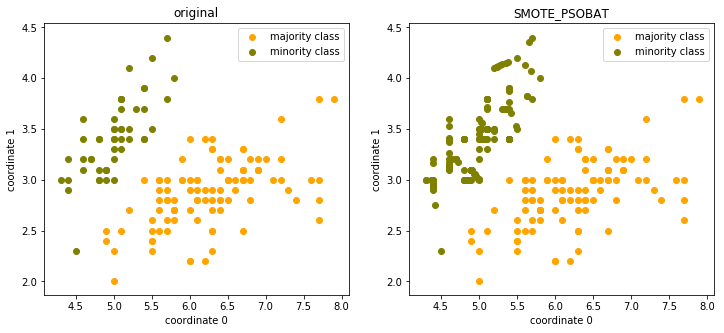

2019-06-11 18:19:42,870:INFO:MDO: Running sampling via ('MDO', "{'proportion': 1.0, 'K2': 5, 'K1_frac': 0.5, 'n_jobs': 1}")


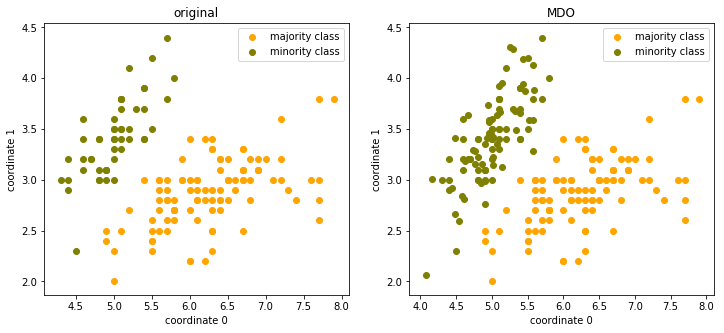

2019-06-11 18:19:43,216:INFO:Random_SMOTE: Running sampling via ('Random_SMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'n_jobs': 1}")


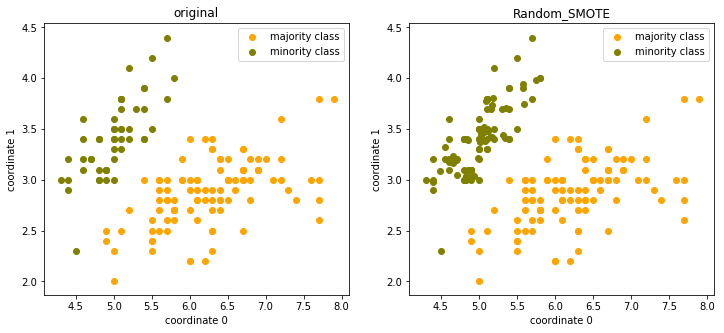

2019-06-11 18:19:43,446:INFO:ISMOTE: Running sampling via ('ISMOTE', "{'n_neighbors': 5, 'minority_weight': 0.5, 'n_jobs': 1}")


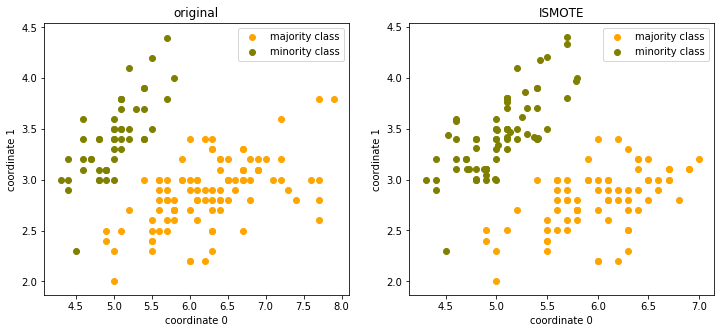

2019-06-11 18:19:43,671:INFO:VIS_RST: Running sampling via ('VIS_RST', "{'proportion': 1.0, 'n_neighbors': 5, 'n_jobs': 1}")


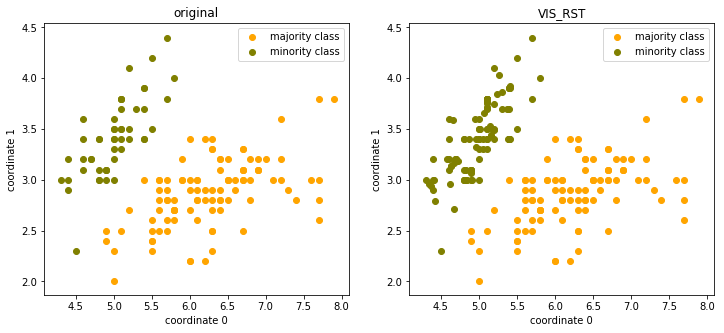

2019-06-11 18:19:43,898:INFO:GASMOTE: Running sampling via ('GASMOTE', "{'n_neighbors': 5, 'maxn': 7, 'n_pop': 10, 'popl3': 5, 'pm': 0.3, 'pr': 0.2, 'Ge': 10, 'n_jobs': 1}")


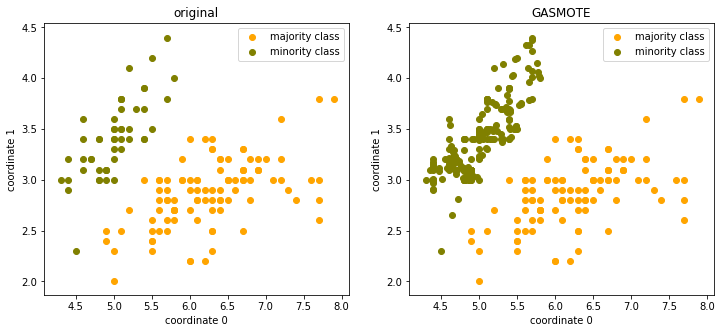

2019-06-11 18:19:44,624:INFO:A_SUWO: Running sampling via ('A_SUWO', "{'proportion': 1.0, 'n_neighbors': 5, 'n_clus_maj': 7, 'c_thres': 0.8, 'n_jobs': 1}")


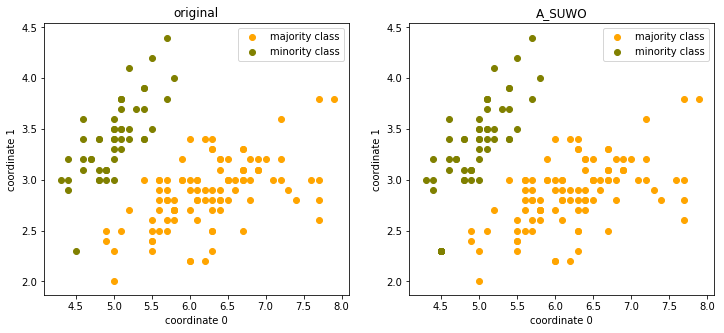

2019-06-11 18:19:47,030:INFO:SMOTE_FRST_2T: Running sampling via ('SMOTE_FRST_2T', "{'n_neighbors': 5, 'gamma_S': 0.7, 'gamma_M': 0.03, 'n_jobs': 1}")
2019-06-11 18:19:47,031:INFO:SMOTE_FRST_2T:iteration: 0
2019-06-11 18:19:47,032:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 0.2, 'n_neighbors': 5, 'n_jobs': 1}")
2019-06-11 18:19:47,034:INFO:SMOTE_FRST_2T:minority added: 10, majority removed: 0
2019-06-11 18:19:47,035:INFO:SMOTE_FRST_2T:iteration: 1
2019-06-11 18:19:47,036:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 0.2, 'n_neighbors': 5, 'n_jobs': 1}")
2019-06-11 18:19:47,037:INFO:SMOTE_FRST_2T:minority added: 10, majority removed: 0
2019-06-11 18:19:47,038:INFO:SMOTE_FRST_2T:iteration: 2
2019-06-11 18:19:47,039:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 0.2, 'n_neighbors': 5, 'n_jobs': 1}")
2019-06-11 18:19:47,040:INFO:SMOTE_FRST_2T:minority added: 10, majority removed: 0
2019-06-11 18:19:47,041:INFO:SMOTE_FRST_2T:iteration: 3
2019-06-11 18

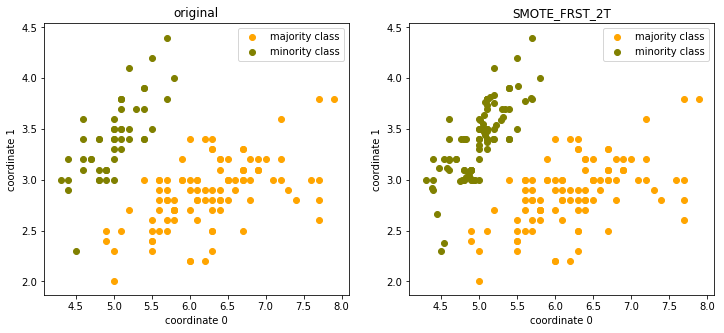

2019-06-11 18:19:47,353:INFO:AND_SMOTE: Running sampling via ('AND_SMOTE', "{'proportion': 1.0, 'K': 15, 'n_jobs': 1}")


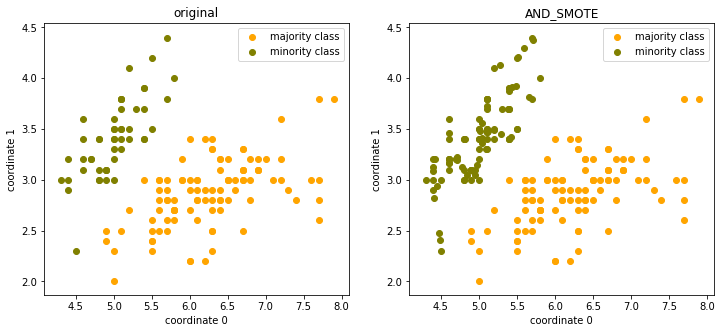

2019-06-11 18:19:47,636:INFO:NRAS: Running sampling via ('NRAS', "{'proportion': 1.0, 'n_neighbors': 5, 't': 0.5, 'n_jobs': 1}")


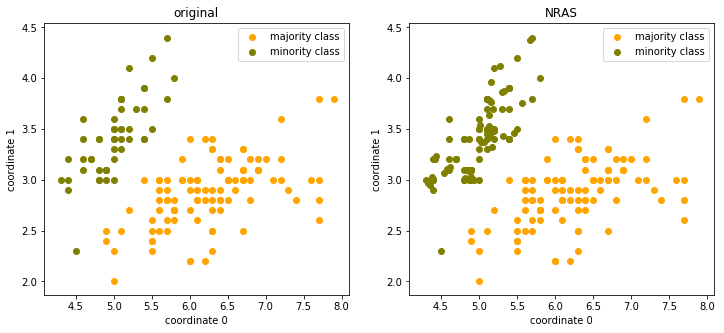

2019-06-11 18:19:48,013:INFO:AMSCO: Running sampling via ('AMSCO', "{'n_pop': 5, 'n_iter': 15, 'omega': 0.1, 'r1': 0.1, 'r2': 0.1, 'n_jobs': 1, 'classifier': DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,\n            max_features=None, max_leaf_nodes=None,\n            min_impurity_decrease=0.0, min_impurity_split=None,\n            min_samples_leaf=1, min_samples_split=2,\n            min_weight_fraction_leaf=0.0, presort=False, random_state=None,\n            splitter='best')}")
2019-06-11 18:19:48,013:INFO:AMSCO: staring iteration 0
2019-06-11 18:19:48,014:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 1.1504016681765672, 'n_neighbors': 7, 'n_jobs': 1}")
2019-06-11 18:19:48,019:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 1.016874163874667, 'n_neighbors': 9, 'n_jobs': 1}")
2019-06-11 18:19:48,023:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 1.1175503585194912, 'n_neighbors': 10, 'n_jobs': 1}")
2019-06-11 18:19:48,

2019-06-11 18:19:48,216:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 3.186492146984019, 'n_neighbors': 10, 'n_jobs': 1}")
2019-06-11 18:19:48,220:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 3.3878445362736676, 'n_neighbors': 10, 'n_jobs': 1}")
2019-06-11 18:19:48,225:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 3.4147978920910624, 'n_neighbors': 10, 'n_jobs': 1}")
2019-06-11 18:19:48,229:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 2.661423423124801, 'n_neighbors': 10, 'n_jobs': 1}")
2019-06-11 18:19:48,233:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 3.6627110952562605, 'n_neighbors': 10, 'n_jobs': 1}")
2019-06-11 18:19:48,237:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 3.3835172226250148, 'n_neighbors': 10, 'n_jobs': 1}")
2019-06-11 18:19:48,241:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 3.594021993246011, 'n_neighbors': 10, 'n_jobs': 1}")
2019-06-11 18:19:48,244:INFO:SMOTE: Running 

2019-06-11 18:19:48,610:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 2.3794800119919897, 'n_neighbors': 10, 'n_jobs': 1}")
2019-06-11 18:19:48,614:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 2.2041537359773336, 'n_neighbors': 10, 'n_jobs': 1}")
2019-06-11 18:19:48,617:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 1.712147490640153, 'n_neighbors': 9, 'n_jobs': 1}")
2019-06-11 18:19:48,620:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 2.141835538483089, 'n_neighbors': 10, 'n_jobs': 1}")
2019-06-11 18:19:48,624:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 2.3082593835137843, 'n_neighbors': 9, 'n_jobs': 1}")
2019-06-11 18:19:48,627:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 2.5506547344554718, 'n_neighbors': 10, 'n_jobs': 1}")
2019-06-11 18:19:48,630:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 2.366100759703202, 'n_neighbors': 10, 'n_jobs': 1}")
2019-06-11 18:19:48,634:INFO:SMOTE: Running sa

2019-06-11 18:19:48,833:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 2.055856244211922, 'n_neighbors': 10, 'n_jobs': 1}")
2019-06-11 18:19:48,836:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 1.851320163970819, 'n_neighbors': 10, 'n_jobs': 1}")
2019-06-11 18:19:48,839:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 1.758032699313609, 'n_neighbors': 10, 'n_jobs': 1}")
2019-06-11 18:19:48,842:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 2.045421111713142, 'n_neighbors': 10, 'n_jobs': 1}")
2019-06-11 18:19:48,846:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 1.6586188809389133, 'n_neighbors': 10, 'n_jobs': 1}")
2019-06-11 18:19:48,849:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 2.2514387871937025, 'n_neighbors': 10, 'n_jobs': 1}")
2019-06-11 18:19:48,852:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 2.0341192019375307, 'n_neighbors': 10, 'n_jobs': 1}")
2019-06-11 18:19:48,856:INFO:SMOTE: Running s

2019-06-11 18:19:49,186:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 0.8591537994535523, 'n_neighbors': 9, 'n_jobs': 1}")
2019-06-11 18:19:49,190:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 1.13630089482988, 'n_neighbors': 6, 'n_jobs': 1}")
2019-06-11 18:19:49,193:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 1.083263891561645, 'n_neighbors': 10, 'n_jobs': 1}")
2019-06-11 18:19:49,197:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 1.4758417562543618, 'n_neighbors': 9, 'n_jobs': 1}")
2019-06-11 18:19:49,200:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 0.9581039268367244, 'n_neighbors': 10, 'n_jobs': 1}")
2019-06-11 18:19:49,203:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 0.9996915382468702, 'n_neighbors': 10, 'n_jobs': 1}")
2019-06-11 18:19:49,207:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 1.287577363237621, 'n_neighbors': 7, 'n_jobs': 1}")
2019-06-11 18:19:49,211:INFO:SMOTE: Running sampl

2019-06-11 18:19:49,405:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 2.547928875179012, 'n_neighbors': 10, 'n_jobs': 1}")
2019-06-11 18:19:49,410:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 2.951386294702208, 'n_neighbors': 10, 'n_jobs': 1}")
2019-06-11 18:19:49,414:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 2.8493920576479095, 'n_neighbors': 10, 'n_jobs': 1}")
2019-06-11 18:19:49,417:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 3.604349489749288, 'n_neighbors': 10, 'n_jobs': 1}")
2019-06-11 18:19:49,421:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 2.6086998177922935, 'n_neighbors': 10, 'n_jobs': 1}")
2019-06-11 18:19:49,424:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 2.6886759935810356, 'n_neighbors': 10, 'n_jobs': 1}")
2019-06-11 18:19:49,434:INFO:AMSCO: fitness scores: 1.000000 1.000000 1.000000 1.000000
2019-06-11 18:19:49,434:INFO:AMSCO: staring iteration 4
2019-06-11 18:19:49,435:INFO:SMOTE: R

2019-06-11 18:19:49,642:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 3.2245650265179027, 'n_neighbors': 10, 'n_jobs': 1}")
2019-06-11 18:19:49,647:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 3.162746754192148, 'n_neighbors': 10, 'n_jobs': 1}")
2019-06-11 18:19:49,651:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 3.4342091841915545, 'n_neighbors': 10, 'n_jobs': 1}")
2019-06-11 18:19:49,655:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 3.258871479505123, 'n_neighbors': 10, 'n_jobs': 1}")
2019-06-11 18:19:49,658:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 3.0193583974888587, 'n_neighbors': 10, 'n_jobs': 1}")
2019-06-11 18:19:49,662:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 3.432478854427901, 'n_neighbors': 10, 'n_jobs': 1}")
2019-06-11 18:19:49,666:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 3.367716854848539, 'n_neighbors': 10, 'n_jobs': 1}")
2019-06-11 18:19:49,673:INFO:SMOTE: Running s

2019-06-11 18:19:50,040:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 1.6748622043862313, 'n_neighbors': 10, 'n_jobs': 1}")
2019-06-11 18:19:50,044:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 1.674222512119944, 'n_neighbors': 10, 'n_jobs': 1}")
2019-06-11 18:19:50,048:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 2.108198096966278, 'n_neighbors': 10, 'n_jobs': 1}")
2019-06-11 18:19:50,051:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 1.7100424911796184, 'n_neighbors': 10, 'n_jobs': 1}")
2019-06-11 18:19:50,055:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 2.2426975889607235, 'n_neighbors': 10, 'n_jobs': 1}")
2019-06-11 18:19:50,058:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 1.8154748710386341, 'n_neighbors': 10, 'n_jobs': 1}")
2019-06-11 18:19:50,062:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 1.8147996403131086, 'n_neighbors': 10, 'n_jobs': 1}")
2019-06-11 18:19:50,066:INFO:SMOTE: Running

2019-06-11 18:19:50,263:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 1.8584950132073055, 'n_neighbors': 10, 'n_jobs': 1}")
2019-06-11 18:19:50,266:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 1.647591779233163, 'n_neighbors': 10, 'n_jobs': 1}")
2019-06-11 18:19:50,270:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 1.8510708656386239, 'n_neighbors': 10, 'n_jobs': 1}")
2019-06-11 18:19:50,273:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 1.5962587260273617, 'n_neighbors': 10, 'n_jobs': 1}")
2019-06-11 18:19:50,276:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 1.7893032767750996, 'n_neighbors': 10, 'n_jobs': 1}")
2019-06-11 18:19:50,279:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 2.037943452371392, 'n_neighbors': 10, 'n_jobs': 1}")
2019-06-11 18:19:50,283:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 1.8129800027989735, 'n_neighbors': 10, 'n_jobs': 1}")
2019-06-11 18:19:50,287:INFO:SMOTE: Running

2019-06-11 18:19:50,644:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 0.8664956083750814, 'n_neighbors': 6, 'n_jobs': 1}")
2019-06-11 18:19:50,648:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 0.8107951838746298, 'n_neighbors': 10, 'n_jobs': 1}")
2019-06-11 18:19:50,652:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 1.1397189939648462, 'n_neighbors': 8, 'n_jobs': 1}")
2019-06-11 18:19:50,655:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 1.0227025412661859, 'n_neighbors': 5, 'n_jobs': 1}")
2019-06-11 18:19:50,658:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 0.8128611903433453, 'n_neighbors': 10, 'n_jobs': 1}")
2019-06-11 18:19:50,662:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 0.9879649709192931, 'n_neighbors': 7, 'n_jobs': 1}")
2019-06-11 18:19:50,665:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 0.9276228443771372, 'n_neighbors': 10, 'n_jobs': 1}")
2019-06-11 18:19:50,669:INFO:SMOTE: Running s

2019-06-11 18:19:50,867:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 2.214651136032347, 'n_neighbors': 10, 'n_jobs': 1}")
2019-06-11 18:19:50,870:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 2.8724987562127806, 'n_neighbors': 10, 'n_jobs': 1}")
2019-06-11 18:19:50,874:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 2.638465850815459, 'n_neighbors': 10, 'n_jobs': 1}")
2019-06-11 18:19:50,877:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 2.1109567857739373, 'n_neighbors': 10, 'n_jobs': 1}")
2019-06-11 18:19:50,881:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 2.4476948253430675, 'n_neighbors': 10, 'n_jobs': 1}")
2019-06-11 18:19:50,884:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 2.33165227430046, 'n_neighbors': 10, 'n_jobs': 1}")
2019-06-11 18:19:50,888:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 3.016910211988412, 'n_neighbors': 10, 'n_jobs': 1}")
2019-06-11 18:19:50,892:INFO:SMOTE: Running sa

2019-06-11 18:19:51,226:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 1.890949620354022, 'n_neighbors': 10, 'n_jobs': 1}")
2019-06-11 18:19:51,229:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 1.9602822584989839, 'n_neighbors': 10, 'n_jobs': 1}")
2019-06-11 18:19:51,233:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 2.601065616168856, 'n_neighbors': 10, 'n_jobs': 1}")
2019-06-11 18:19:51,236:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 2.21739915114364, 'n_neighbors': 10, 'n_jobs': 1}")
2019-06-11 18:19:51,239:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 2.2898833222119532, 'n_neighbors': 10, 'n_jobs': 1}")
2019-06-11 18:19:51,243:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 2.0172273937180503, 'n_neighbors': 10, 'n_jobs': 1}")
2019-06-11 18:19:51,247:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 2.0898615860603913, 'n_neighbors': 10, 'n_jobs': 1}")
2019-06-11 18:19:51,251:INFO:SMOTE: Running s

2019-06-11 18:19:51,632:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 1.7144580838146926, 'n_neighbors': 10, 'n_jobs': 1}")
2019-06-11 18:19:51,635:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 2.218360427131734, 'n_neighbors': 10, 'n_jobs': 1}")
2019-06-11 18:19:51,639:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 2.091004015475841, 'n_neighbors': 10, 'n_jobs': 1}")
2019-06-11 18:19:51,642:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 2.0813484534394924, 'n_neighbors': 10, 'n_jobs': 1}")
2019-06-11 18:19:51,645:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 1.9349251651137325, 'n_neighbors': 10, 'n_jobs': 1}")
2019-06-11 18:19:51,649:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 1.8514710860640855, 'n_neighbors': 10, 'n_jobs': 1}")
2019-06-11 18:19:51,652:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 2.3833680040098515, 'n_neighbors': 10, 'n_jobs': 1}")
2019-06-11 18:19:51,656:INFO:SMOTE: Running

2019-06-11 18:19:52,001:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 1.2356145321598002, 'n_neighbors': 10, 'n_jobs': 1}")
2019-06-11 18:19:52,005:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 1.182346375977175, 'n_neighbors': 10, 'n_jobs': 1}")
2019-06-11 18:19:52,008:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 1.3213632196666607, 'n_neighbors': 8, 'n_jobs': 1}")
2019-06-11 18:19:52,011:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 1.4501793952609292, 'n_neighbors': 10, 'n_jobs': 1}")
2019-06-11 18:19:52,014:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 1.7794951271560104, 'n_neighbors': 10, 'n_jobs': 1}")
2019-06-11 18:19:52,017:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 1.3725731271025443, 'n_neighbors': 10, 'n_jobs': 1}")
2019-06-11 18:19:52,021:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 1.306625243399466, 'n_neighbors': 10, 'n_jobs': 1}")
2019-06-11 18:19:52,024:INFO:SMOTE: Running 

2019-06-11 18:19:52,352:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 0.8401306758555582, 'n_neighbors': 10, 'n_jobs': 1}")
2019-06-11 18:19:52,355:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 0.8860931405609138, 'n_neighbors': 9, 'n_jobs': 1}")
2019-06-11 18:19:52,358:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 0.7254326557160058, 'n_neighbors': 10, 'n_jobs': 1}")
2019-06-11 18:19:52,361:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 0.8331613862139537, 'n_neighbors': 7, 'n_jobs': 1}")
2019-06-11 18:19:52,364:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 0.7768065204190845, 'n_neighbors': 6, 'n_jobs': 1}")
2019-06-11 18:19:52,367:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 0.973934350611539, 'n_neighbors': 10, 'n_jobs': 1}")
2019-06-11 18:19:52,371:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 1.0240752211991997, 'n_neighbors': 10, 'n_jobs': 1}")
2019-06-11 18:19:52,374:INFO:SMOTE: Running s

2019-06-11 18:19:52,561:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 2.5223457157168676, 'n_neighbors': 10, 'n_jobs': 1}")
2019-06-11 18:19:52,565:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 2.0612815480318964, 'n_neighbors': 10, 'n_jobs': 1}")
2019-06-11 18:19:52,569:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 2.276739009027793, 'n_neighbors': 10, 'n_jobs': 1}")
2019-06-11 18:19:52,572:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 2.164029277438054, 'n_neighbors': 10, 'n_jobs': 1}")
2019-06-11 18:19:52,576:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 2.5582849378229633, 'n_neighbors': 10, 'n_jobs': 1}")
2019-06-11 18:19:52,579:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 2.6585666789982847, 'n_neighbors': 10, 'n_jobs': 1}")
2019-06-11 18:19:52,583:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 2.1726156308563787, 'n_neighbors': 10, 'n_jobs': 1}")
2019-06-11 18:19:52,586:INFO:SMOTE: Running

2019-06-11 18:19:52,912:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 2.6401479811100237, 'n_neighbors': 10, 'n_jobs': 1}")
2019-06-11 18:19:52,915:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 2.663734486674276, 'n_neighbors': 10, 'n_jobs': 1}")
2019-06-11 18:19:52,919:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 1.997130271121797, 'n_neighbors': 10, 'n_jobs': 1}")
2019-06-11 18:19:52,922:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 2.597291261381427, 'n_neighbors': 10, 'n_jobs': 1}")
2019-06-11 18:19:52,925:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 1.9054693818067276, 'n_neighbors': 10, 'n_jobs': 1}")
2019-06-11 18:19:52,928:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 2.8074709504264397, 'n_neighbors': 10, 'n_jobs': 1}")
2019-06-11 18:19:52,932:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 2.832236781268904, 'n_neighbors': 10, 'n_jobs': 1}")
2019-06-11 18:19:52,935:INFO:SMOTE: Running s

2019-06-11 18:19:53,258:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 1.4761914275939216, 'n_neighbors': 10, 'n_jobs': 1}")
2019-06-11 18:19:53,261:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 2.1298982532690123, 'n_neighbors': 10, 'n_jobs': 1}")
2019-06-11 18:19:53,265:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 1.9670217188614918, 'n_neighbors': 10, 'n_jobs': 1}")
2019-06-11 18:19:53,268:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 1.7067808503114834, 'n_neighbors': 10, 'n_jobs': 1}")
2019-06-11 18:19:53,272:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 1.754018174464598, 'n_neighbors': 10, 'n_jobs': 1}")
2019-06-11 18:19:53,275:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 1.6070500238654195, 'n_neighbors': 10, 'n_jobs': 1}")
2019-06-11 18:19:53,278:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 2.2992101922272803, 'n_neighbors': 10, 'n_jobs': 1}")
2019-06-11 18:19:53,281:INFO:SMOTE: Runnin

2019-06-11 18:19:53,615:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 1.0841321861194175, 'n_neighbors': 10, 'n_jobs': 1}")
2019-06-11 18:19:53,618:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 1.347389477082233, 'n_neighbors': 10, 'n_jobs': 1}")
2019-06-11 18:19:53,621:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 1.4042651609425723, 'n_neighbors': 10, 'n_jobs': 1}")
2019-06-11 18:19:53,624:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 1.1185586506104732, 'n_neighbors': 10, 'n_jobs': 1}")
2019-06-11 18:19:53,627:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 1.4104037992963865, 'n_neighbors': 10, 'n_jobs': 1}")
2019-06-11 18:19:53,630:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 1.2196808528127787, 'n_neighbors': 10, 'n_jobs': 1}")
2019-06-11 18:19:53,633:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 1.501742235987224, 'n_neighbors': 10, 'n_jobs': 1}")
2019-06-11 18:19:53,636:INFO:SMOTE: Running

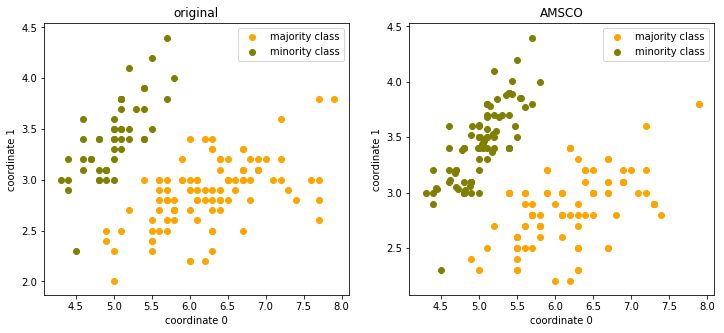

2019-06-11 18:19:54,187:INFO:SSO: Running sampling via ('SSO', "{'proportion': 1.0, 'n_neighbors': 5, 'h': 10, 'n_iter': 5, 'n_jobs': 1}")


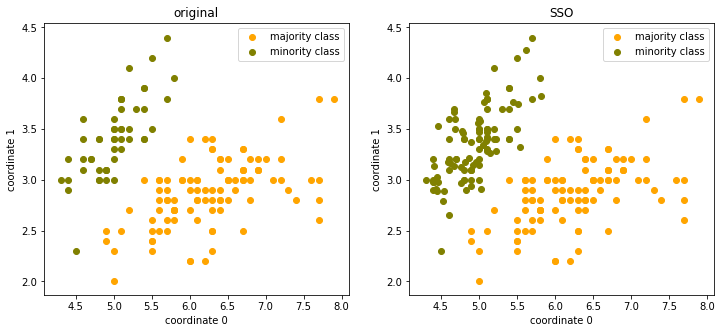

2019-06-11 18:19:57,728:INFO:NDO_sampling: Running sampling via ('NDO_sampling', "{'proportion': 1.0, 'n_neighbors': 5, 'T': 0.5, 'n_jobs': 1}")
/home/gykovacs/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2920: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/gykovacs/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


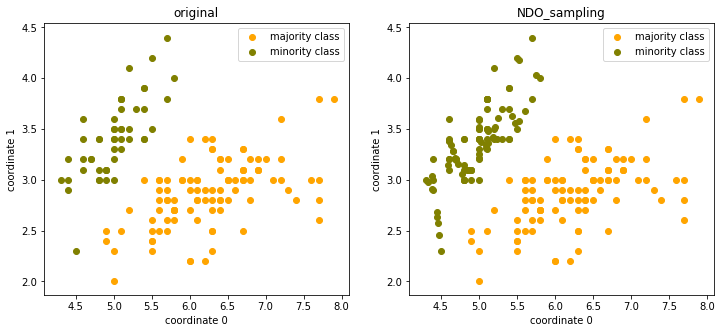

2019-06-11 18:19:58,521:INFO:DSRBF: Running sampling via ('DSRBF', "{'proportion': 1.0, 'n_neighbors': 5, 'm_min': 4, 'm_max': 10, 'I': 2, 'O': 2, 'n_pop': 500, 'n_init_pop': 5000, 'n_iter': 40, 'n_sampling_epoch': 5, 'n_jobs': 1}")
2019-06-11 18:19:58,522:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'n_jobs': 1}")
2019-06-11 18:20:00,839:INFO:DSRBF: Iteration 0/40, loss: 0.443732, data size 200
2019-06-11 18:20:01,102:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'n_jobs': 1}")
2019-06-11 18:20:01,614:INFO:DSRBF: Iteration 1/40, loss: 0.443732, data size 200
2019-06-11 18:20:01,925:INFO:DSRBF: Iteration 2/40, loss: 0.430587, data size 200
2019-06-11 18:20:02,135:INFO:DSRBF: Iteration 3/40, loss: 0.398208, data size 200
2019-06-11 18:20:02,347:INFO:DSRBF: Iteration 4/40, loss: 0.369236, data size 200
2019-06-11 18:20:02,575:INFO:DSRBF: Iteration 5/40, loss: 0.366506, data size 200
2019-06-11 18:20:02,815:INFO:DSRB

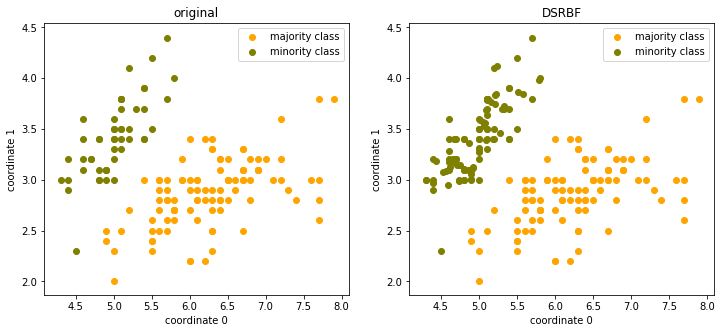

2019-06-11 18:20:19,306:INFO:Gaussian_SMOTE: Running sampling via ('Gaussian_SMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'sigma': 1.0, 'n_jobs': 1}")


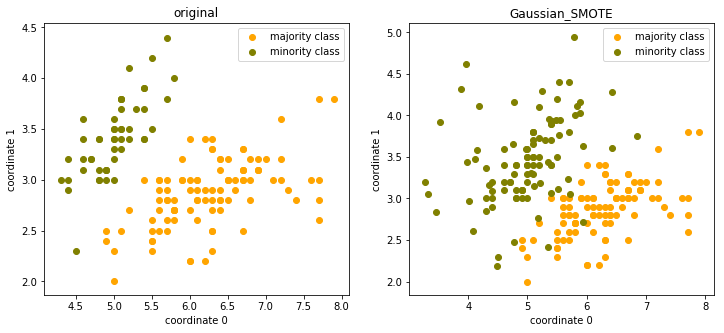

2019-06-11 18:20:19,644:INFO:kmeans_SMOTE: Running sampling via ('kmeans_SMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'n_clusters': 10, 'irt': 2.0, 'n_jobs': 1}")


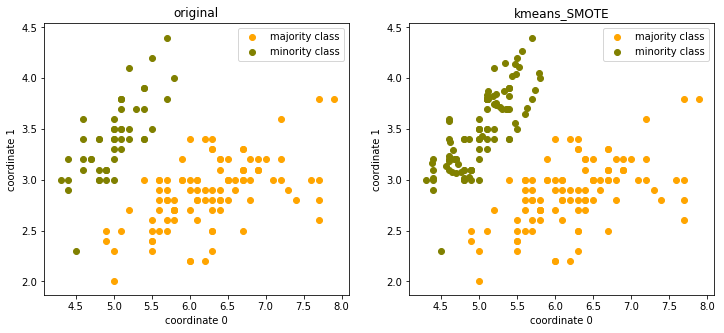

2019-06-11 18:20:19,978:INFO:Supervised_SMOTE: Running sampling via ('Supervised_SMOTE', "{'proportion': 1.0, 'th_lower': 0.5, 'th_upper': 1.0, 'classifier': RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',\n            max_depth=None, max_features='auto', max_leaf_nodes=None,\n            min_impurity_decrease=0.0, min_impurity_split=None,\n            min_samples_leaf=1, min_samples_split=2,\n            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,\n            oob_score=False, random_state=None, verbose=0,\n            warm_start=False), 'n_jobs': 1}")


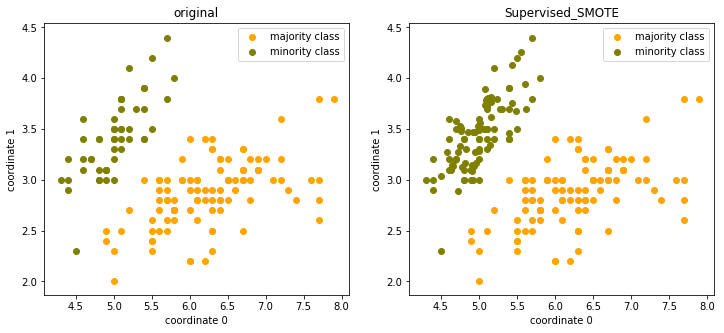

2019-06-11 18:20:20,456:INFO:SN_SMOTE: Running sampling via ('SN_SMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'n_jobs': 1}")


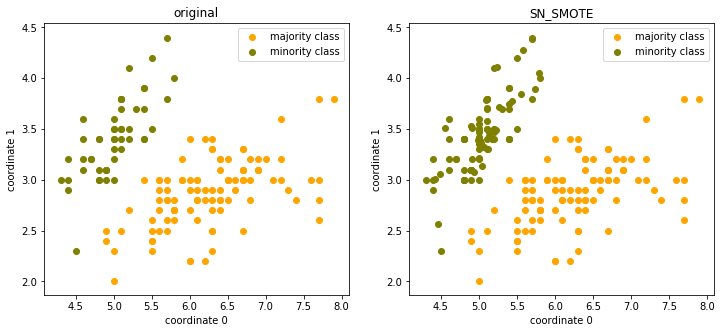

2019-06-11 18:20:20,764:INFO:CCR: Running sampling via ('CCR', "{'proportion': 1.0, 'energy': 1.0, 'scaling': 0.0, 'n_jobs': 1}")


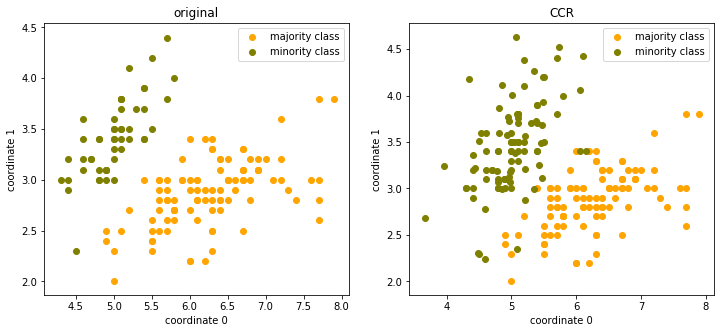

2019-06-11 18:20:21,072:INFO:ANS: Running sampling via ('ANS', "{'proportion': 1.0, 'n_jobs': 1}")
2019-06-11 18:20:21,097:INFO:ANS: Pused is empty


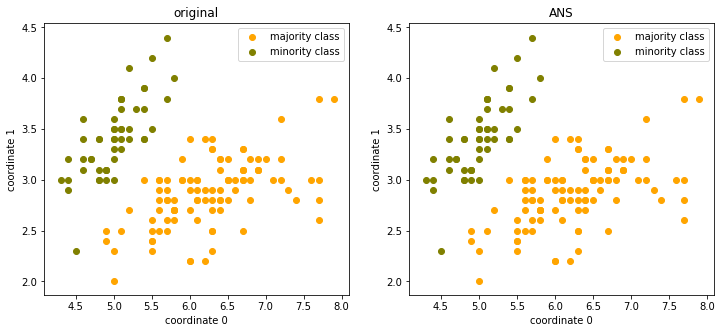

2019-06-11 18:20:21,447:INFO:cluster_SMOTE: Running sampling via ('cluster_SMOTE', "{'proportion': 1.0, 'n_neighbors': 3, 'n_clusters': 3, 'n_jobs': 1}")


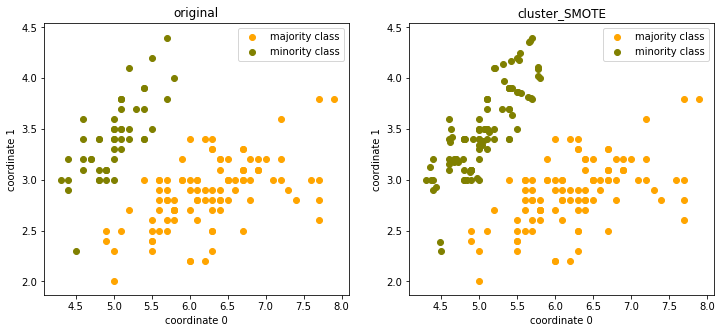

2019-06-11 18:20:21,909:INFO:NoSMOTE: Running sampling via ('NoSMOTE', '{}')


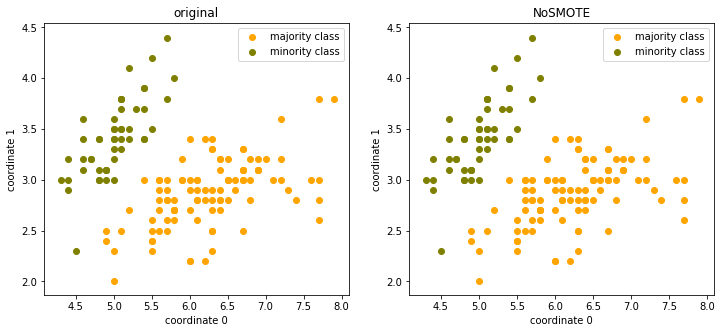

In [11]:
for o in oversamplers:
    oversampler= o()
    X_samp, y_samp= oversampler.sample(X, y)
    
    plt.figure(figsize=(12, 5))
    ax= plt.subplot(121)
    plt.scatter(X[y == 0][:,0], X[y == 0][:,1], label='majority class', c='orange', marker='o')
    plt.scatter(X[y == 1][:,0], X[y == 1][:,1], label='minority class', c='olive', marker='o')
    plt.title('original')
    plt.xlabel('coordinate 0')
    plt.ylabel('coordinate 1')
    plt.legend()
    
    ax= plt.subplot(122)
    plt.scatter(X_samp[y_samp == 0][:,0], X_samp[y_samp == 0][:,1], label='majority class', c='orange', marker='o')
    plt.scatter(X_samp[y_samp == 1][:,0], X_samp[y_samp == 1][:,1], label='minority class', c='olive', marker='o')
    plt.title(oversampler.__class__.__name__)
    plt.xlabel('coordinate 0')
    plt.ylabel('coordinate 1')
    plt.legend()
    plt.show()